In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
pd.set_option('mode.chained_assignment', None)
from google.colab import drive
drive.mount('/content/drive')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Pet_project_logistic_Regression/framingham.csv')

In [ ]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [ ]:
for col in df.columns:
    print('The number of missing values in %s = %d'%(col, df[col].isna().sum()))

The number of missing values in male = 0
The number of missing values in age = 0
The number of missing values in education = 105
The number of missing values in currentSmoker = 0
The number of missing values in cigsPerDay = 29
The number of missing values in BPMeds = 53
The number of missing values in prevalentStroke = 0
The number of missing values in prevalentHyp = 0
The number of missing values in diabetes = 0
The number of missing values in totChol = 50
The number of missing values in sysBP = 0
The number of missing values in diaBP = 0
The number of missing values in BMI = 19
The number of missing values in heartRate = 1
The number of missing values in glucose = 388
The number of missing values in TenYearCHD = 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


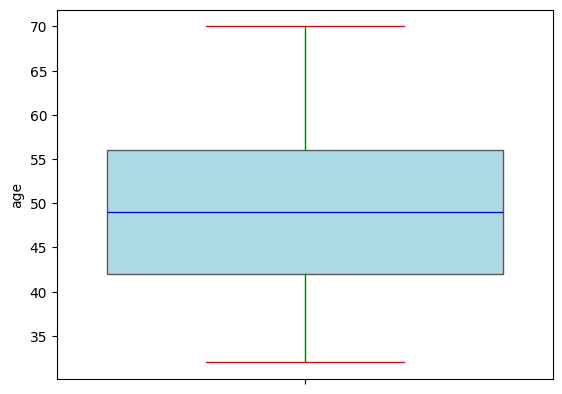

<Figure size 1600x800 with 0 Axes>

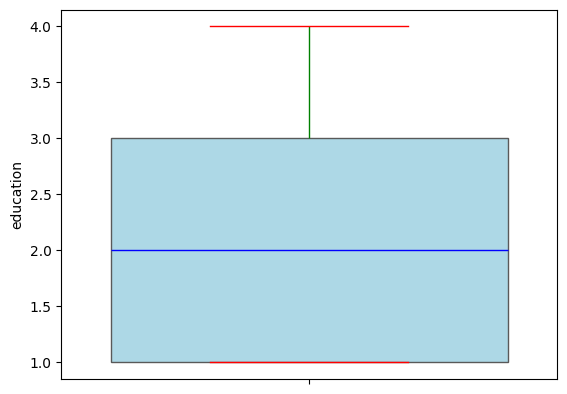

<Figure size 1600x800 with 0 Axes>

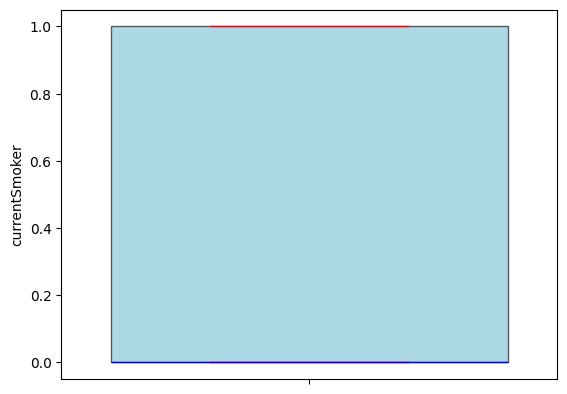

<Figure size 1600x800 with 0 Axes>

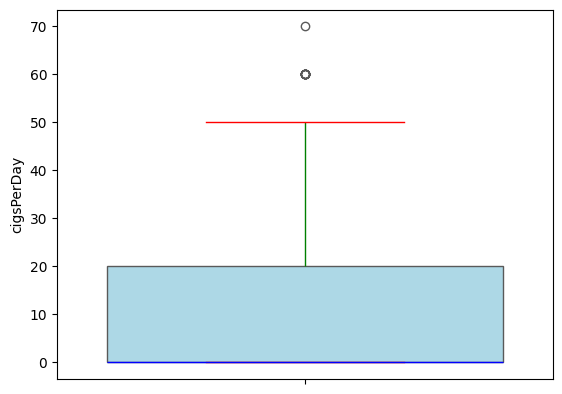

<Figure size 1600x800 with 0 Axes>

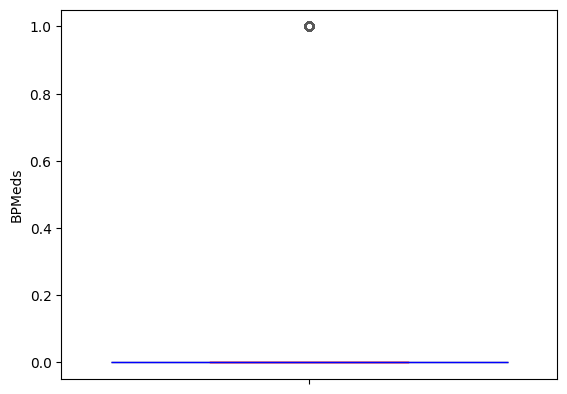

<Figure size 1600x800 with 0 Axes>

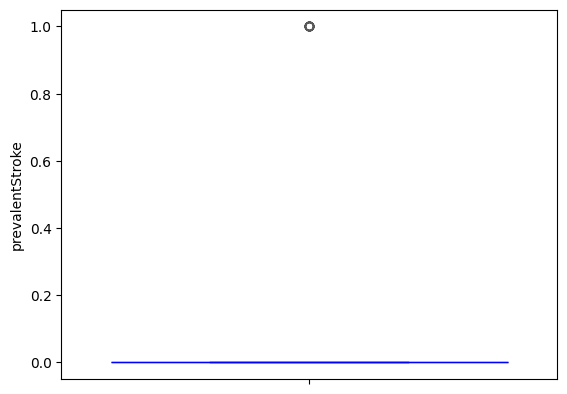

<Figure size 1600x800 with 0 Axes>

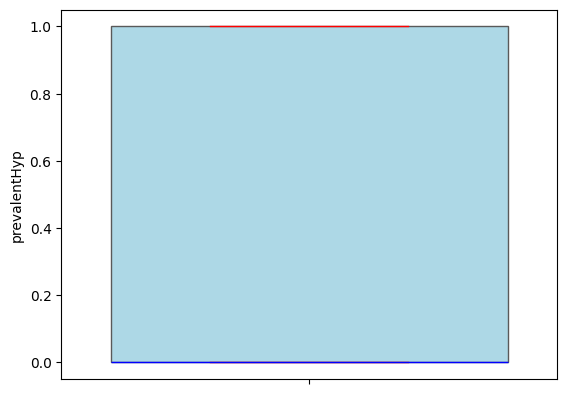

<Figure size 1600x800 with 0 Axes>

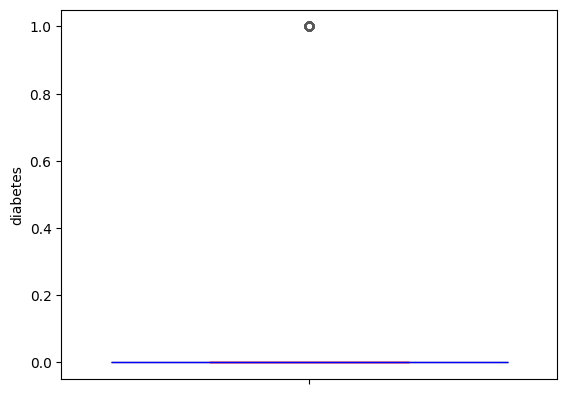

<Figure size 1600x800 with 0 Axes>

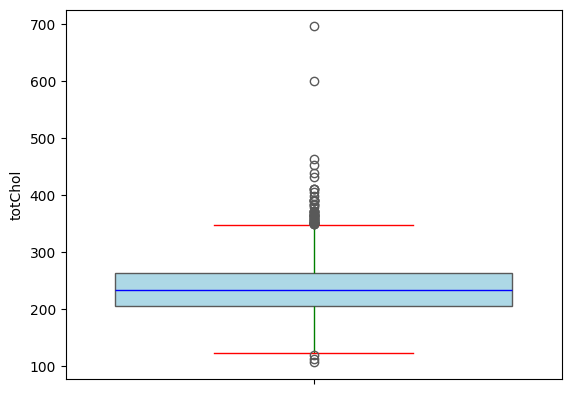

<Figure size 1600x800 with 0 Axes>

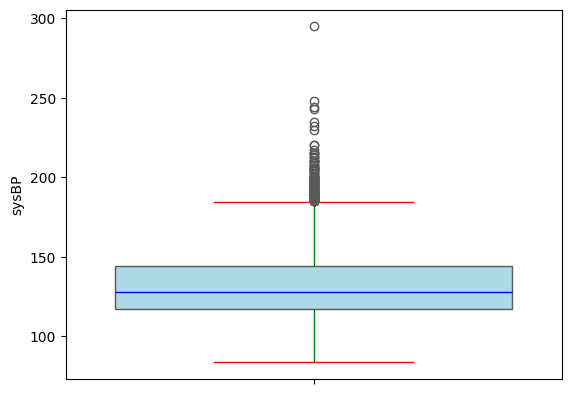

<Figure size 1600x800 with 0 Axes>

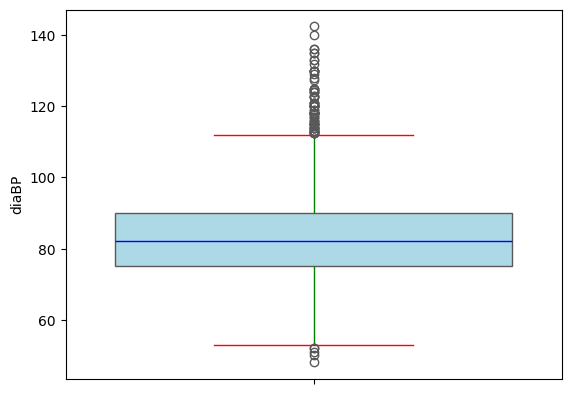

<Figure size 1600x800 with 0 Axes>

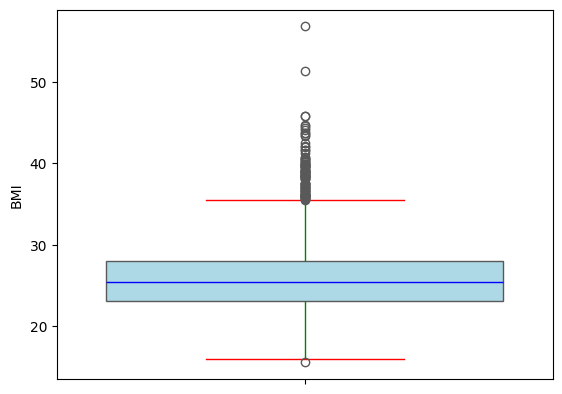

<Figure size 1600x800 with 0 Axes>

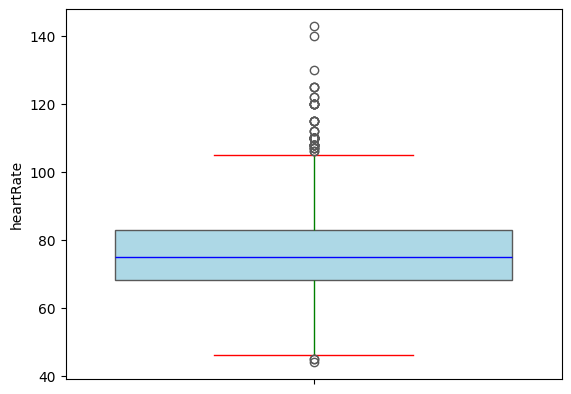

<Figure size 1600x800 with 0 Axes>

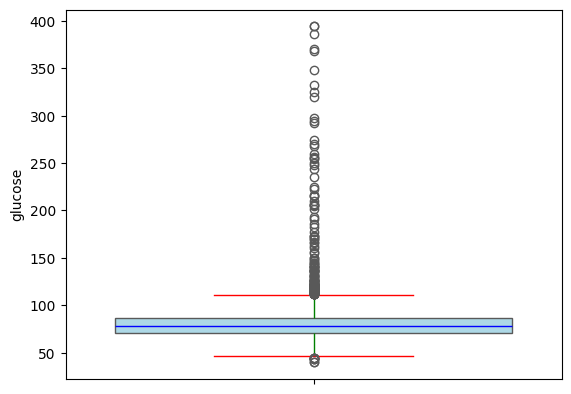

<Figure size 1600x800 with 0 Axes>

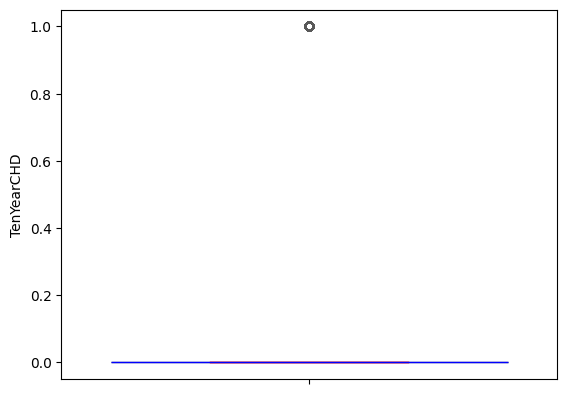

<Figure size 1600x800 with 0 Axes>

In [ ]:
def box_plots(column):
    sns.set_palette('Set2')
    sns.boxplot(data = df, y = column, boxprops=dict(facecolor='lightblue'),
            whiskerprops=dict(color='green'),
            capprops=dict(color='red'),
            medianprops=dict(color='blue'))
    plt.figure(figsize = (16,8))
    plt.show()
for x in df.select_dtypes(include = ['float64', 'int64']).columns.to_list()[1:]:
    box_plots(x)

Constructed BOX PLOT charts for all columns containing float64 and int64

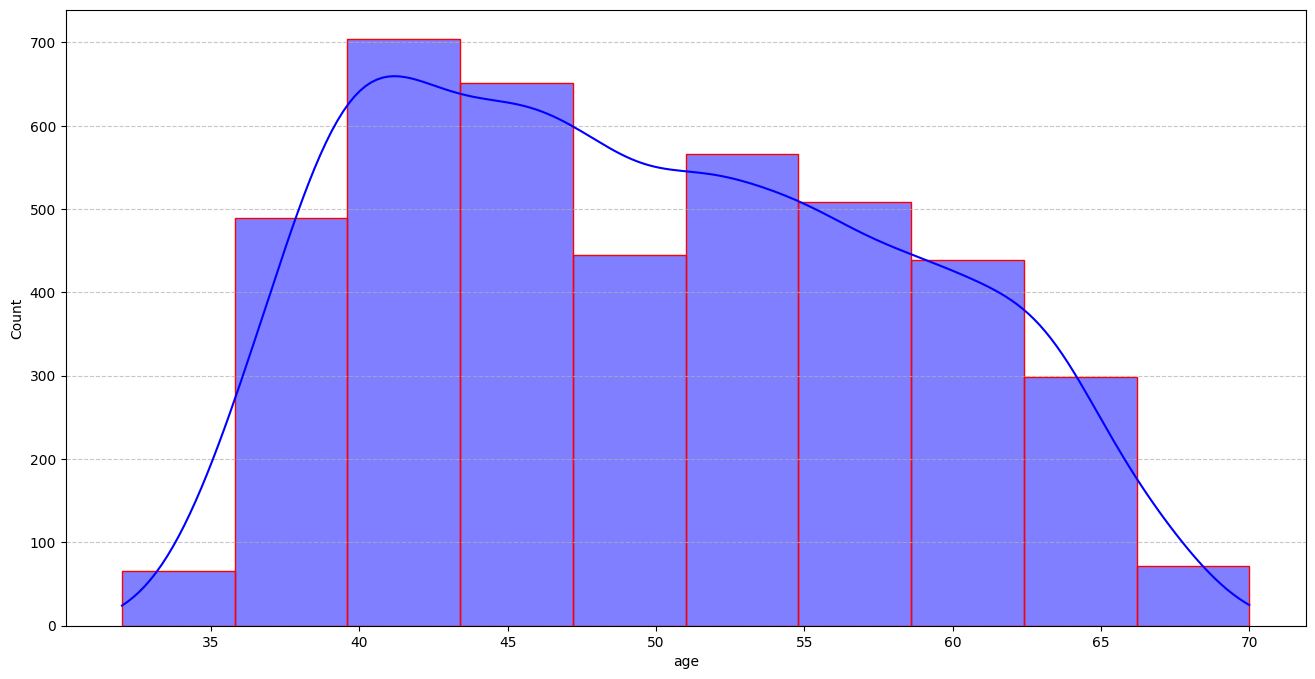

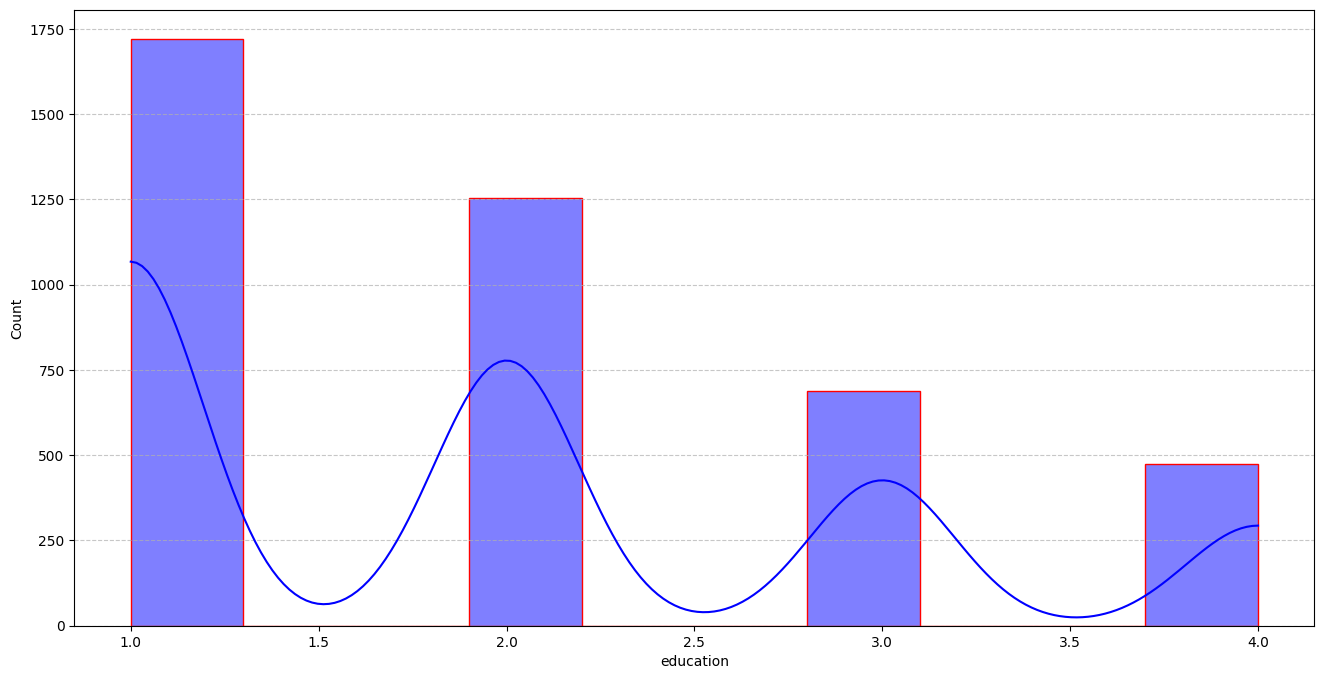

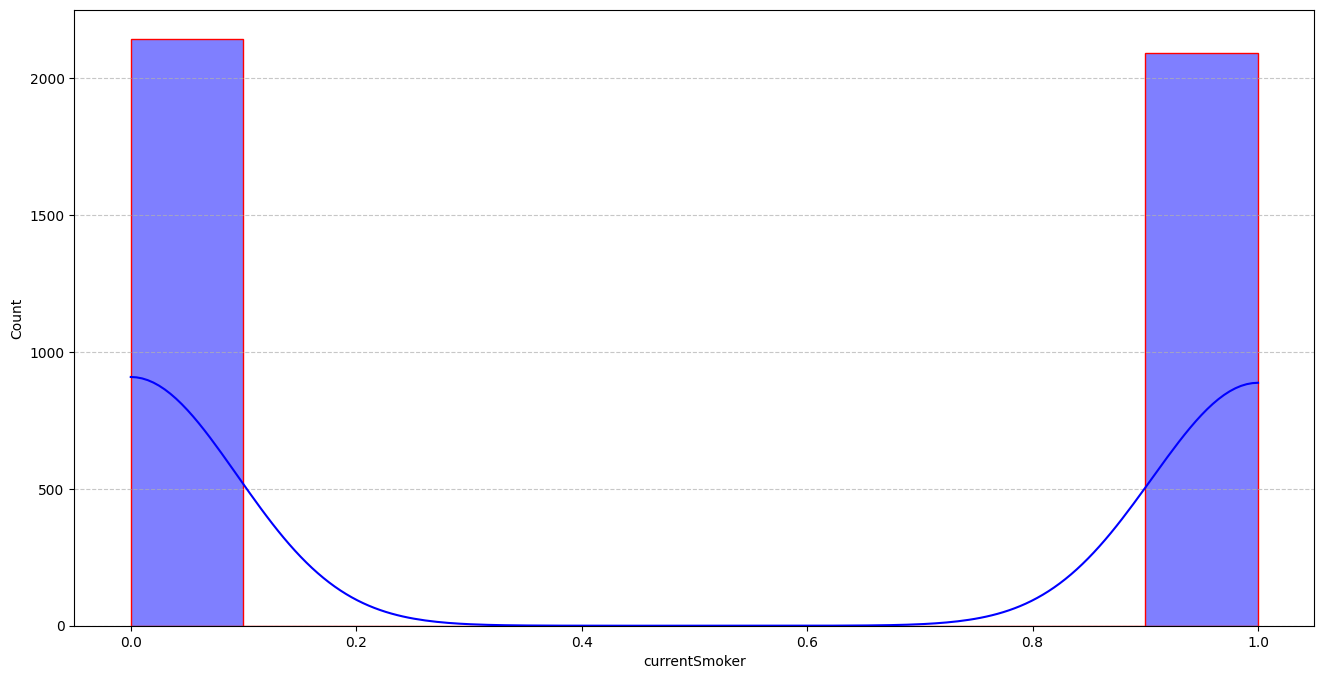

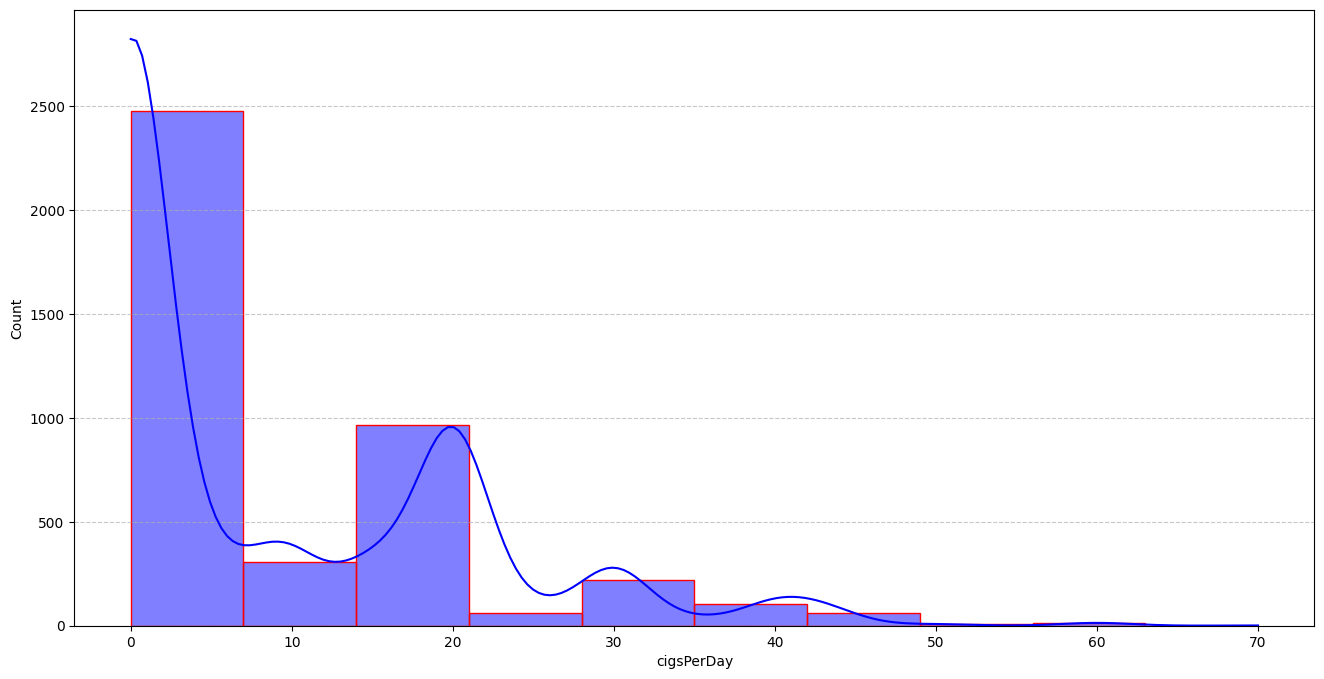

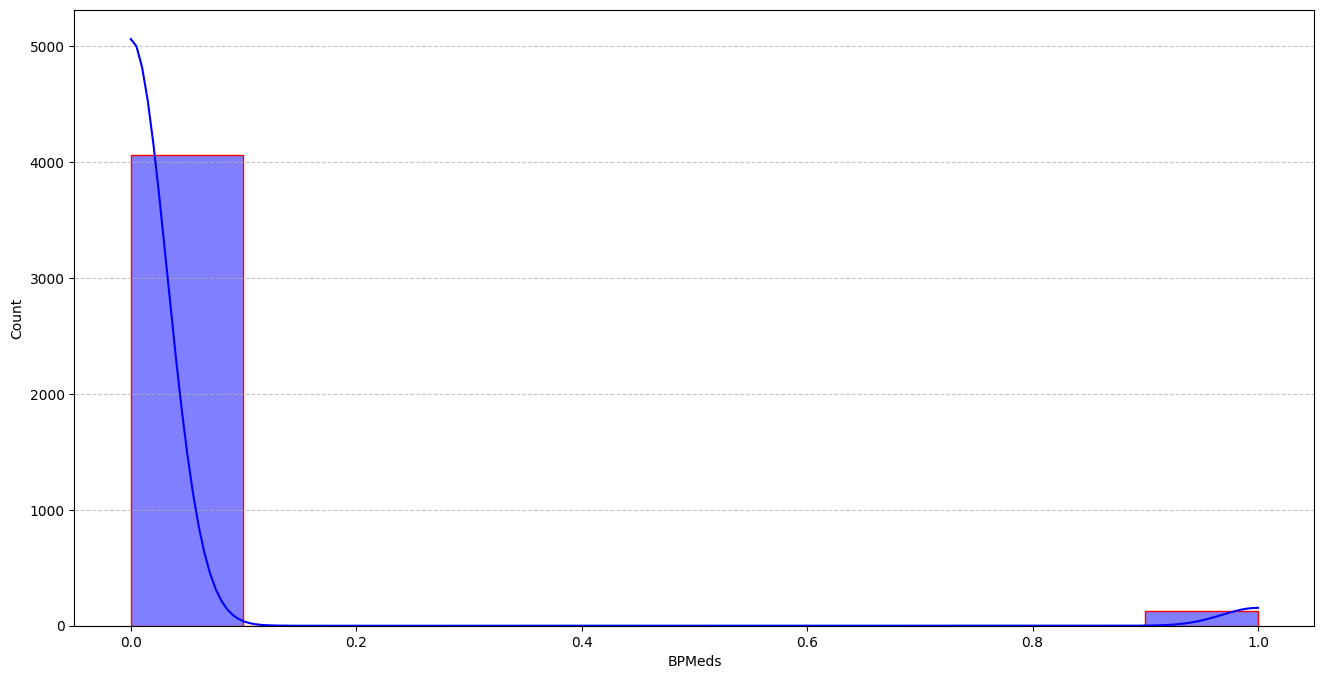

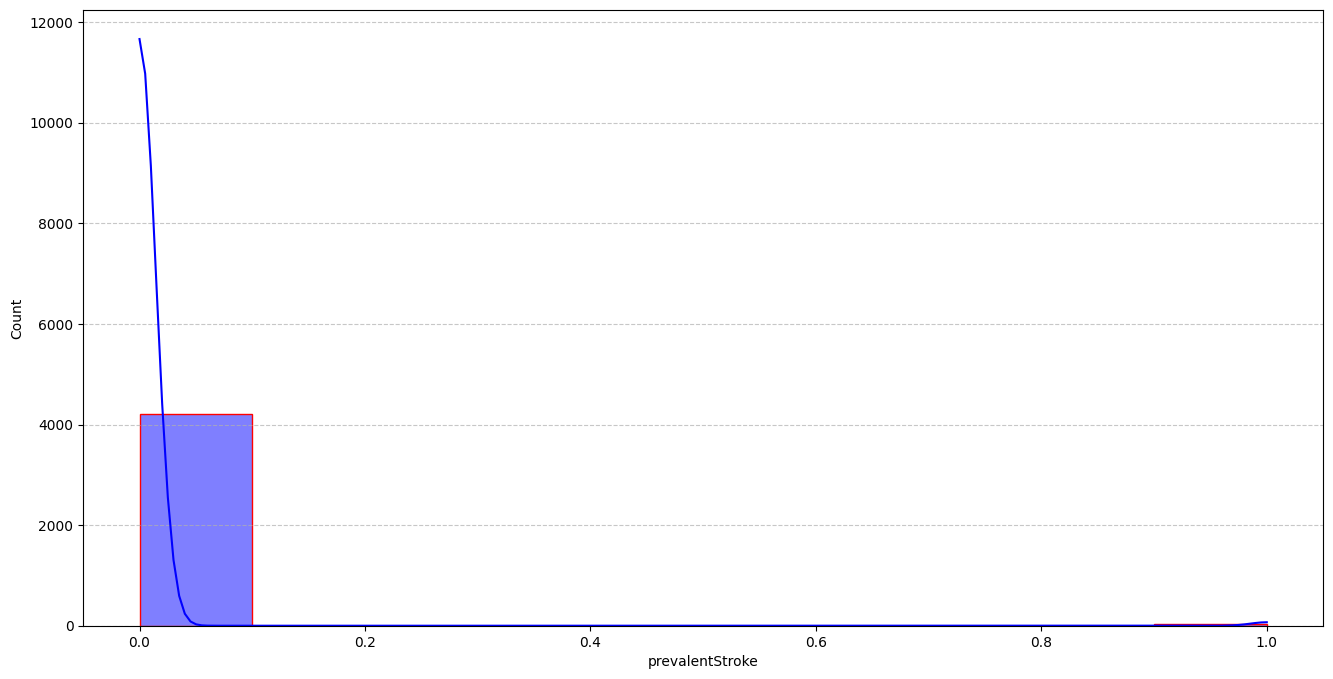

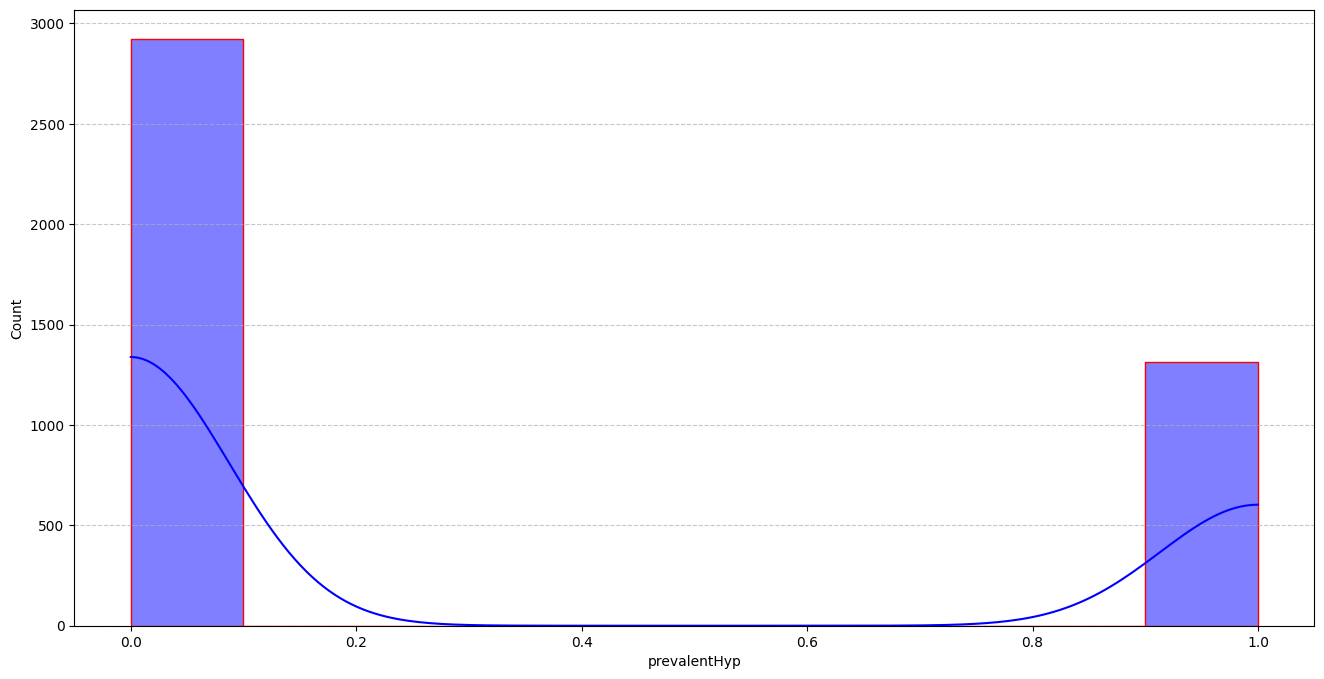

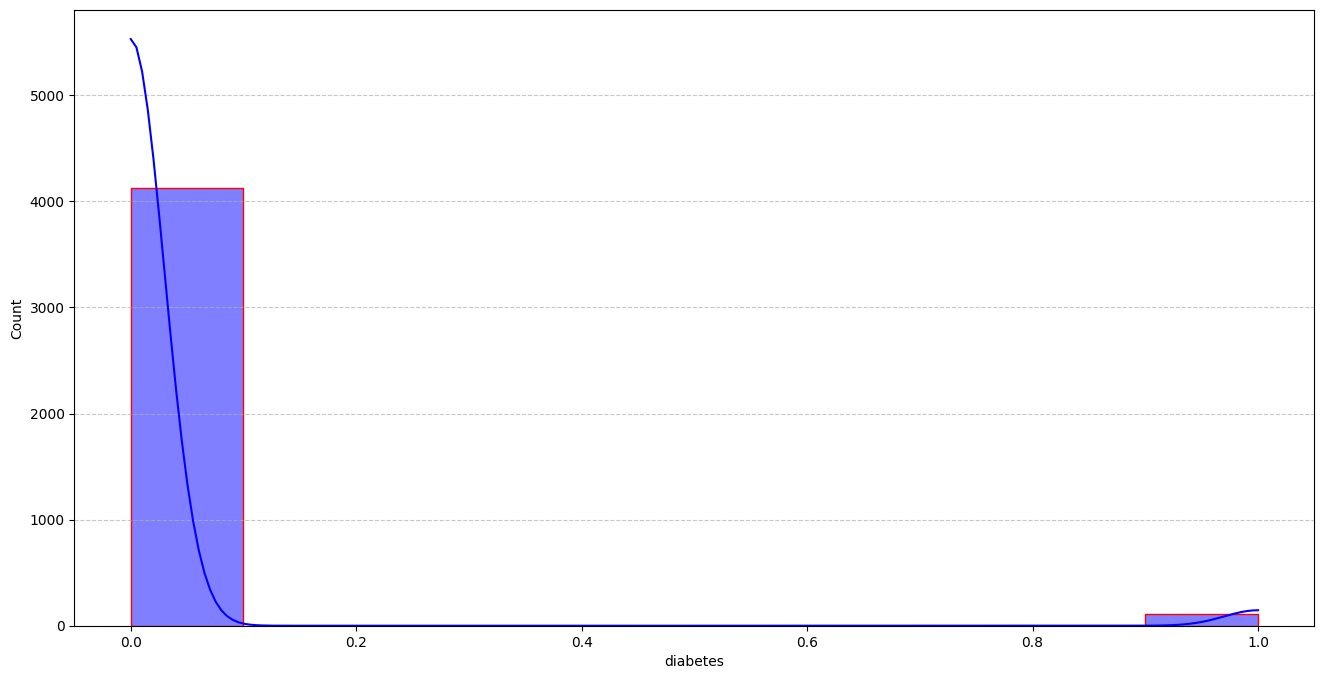

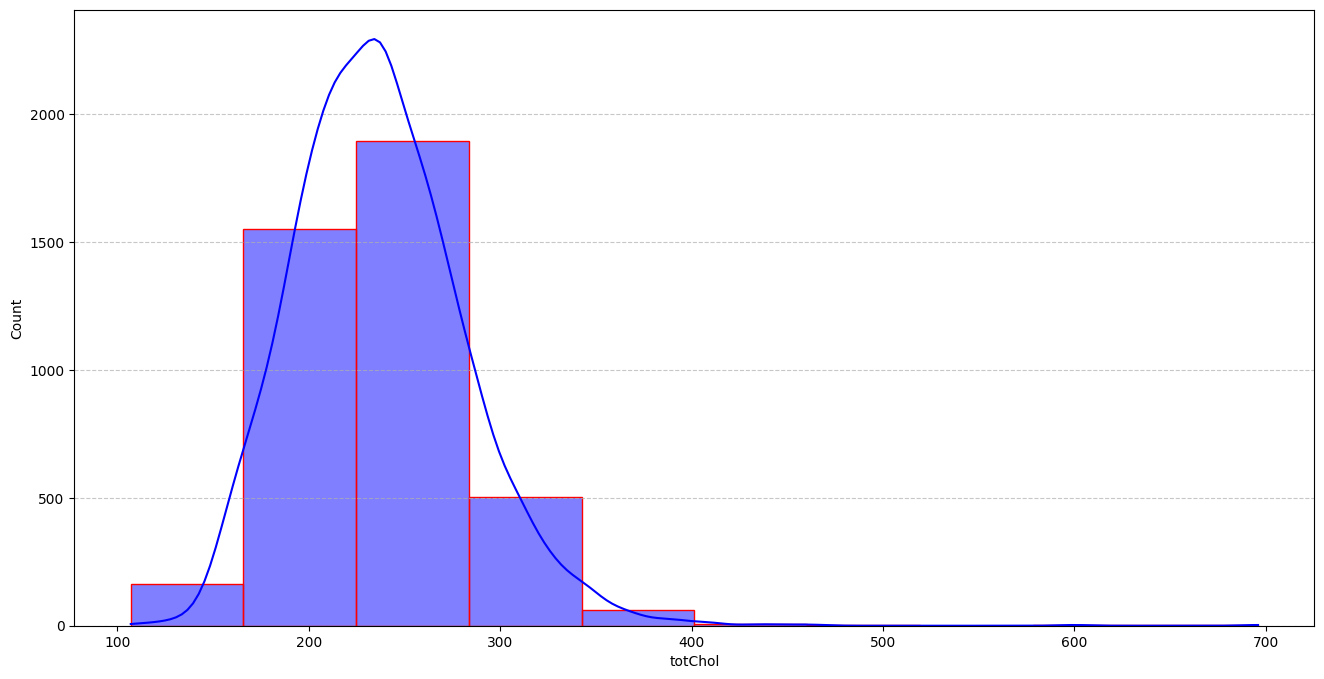

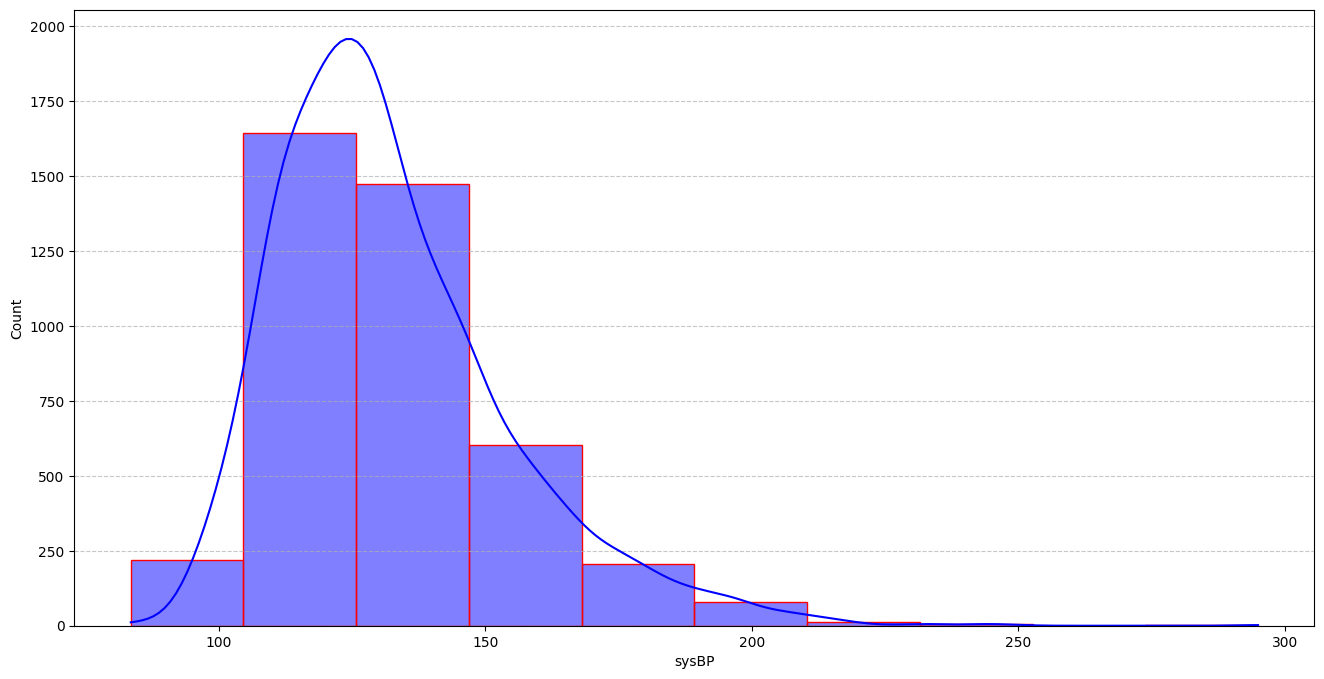

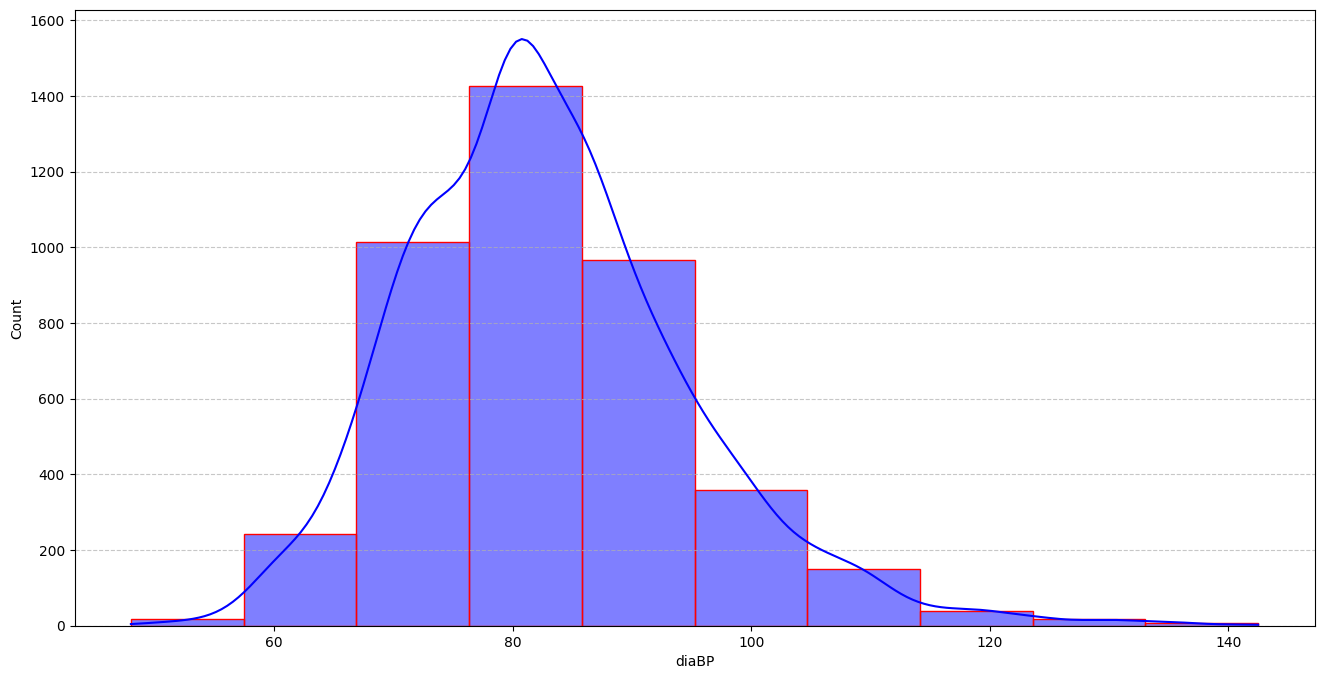

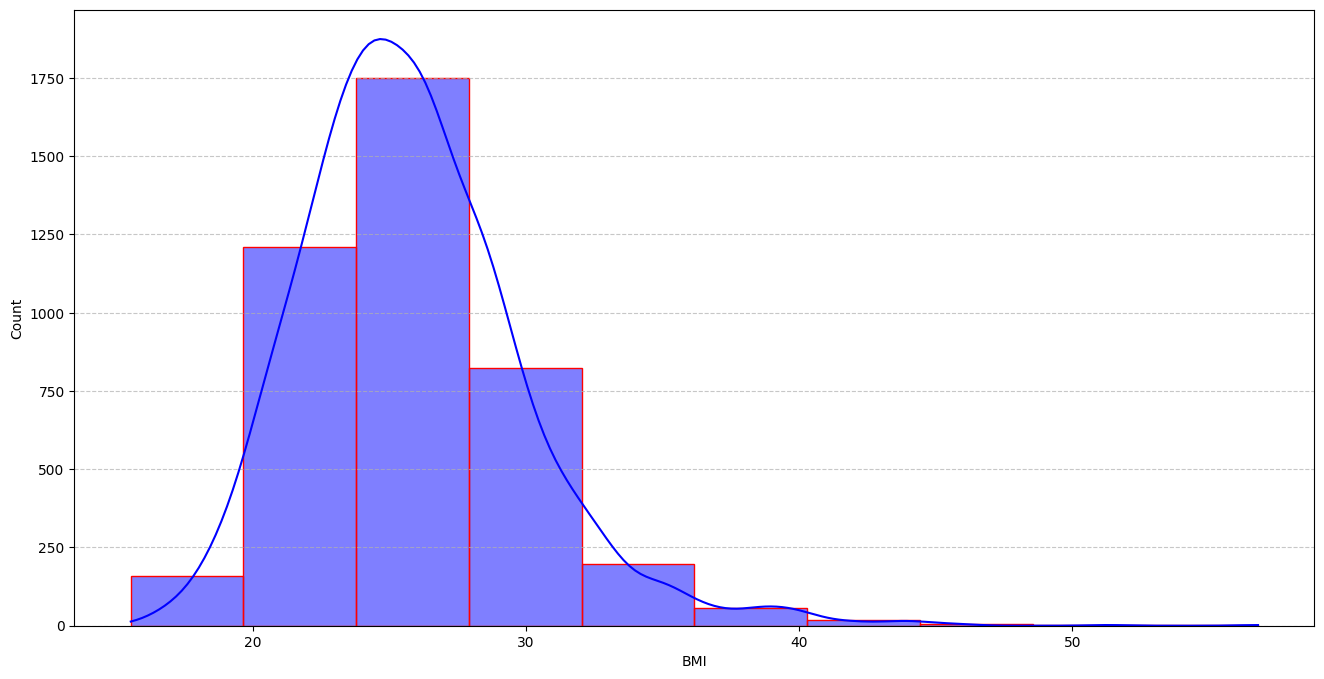

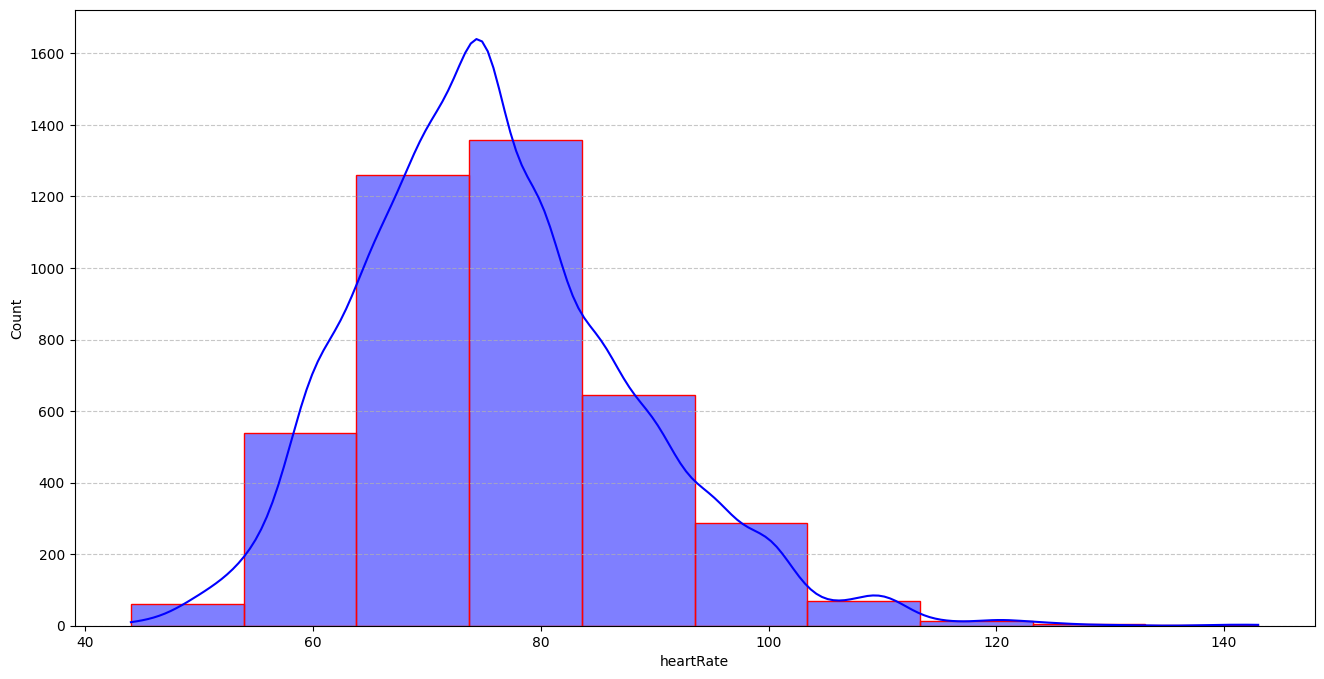

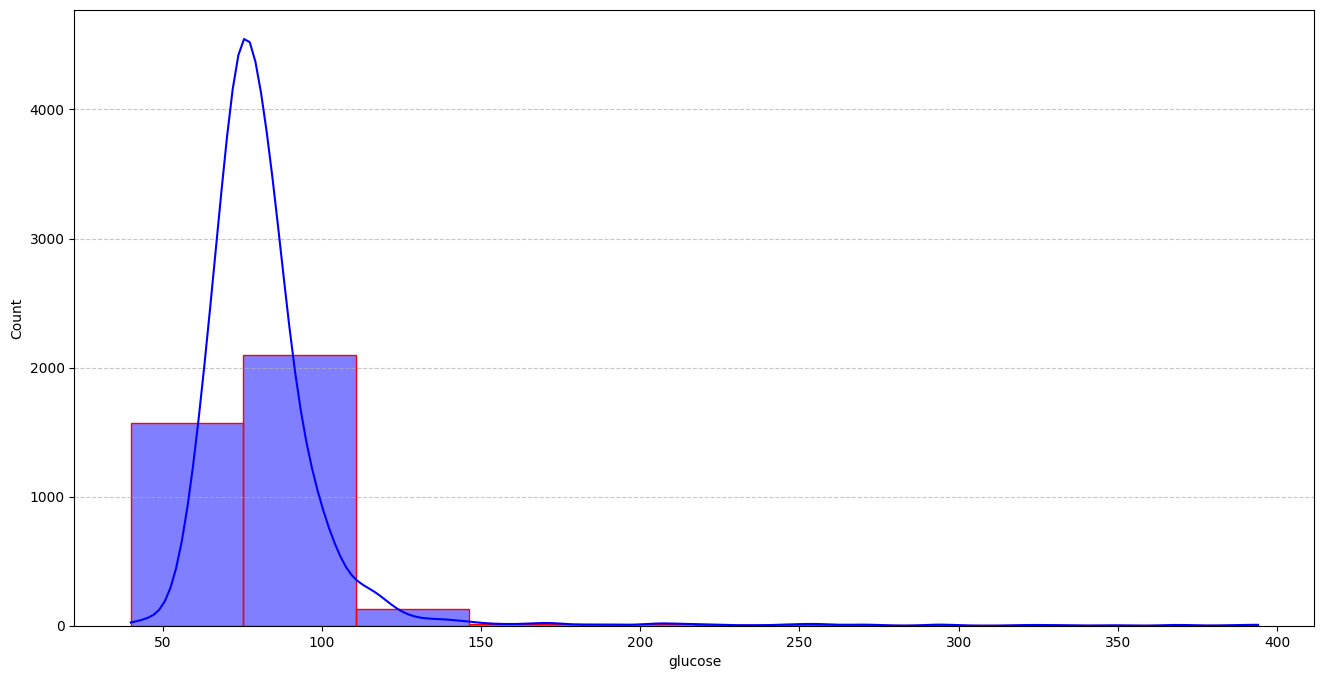

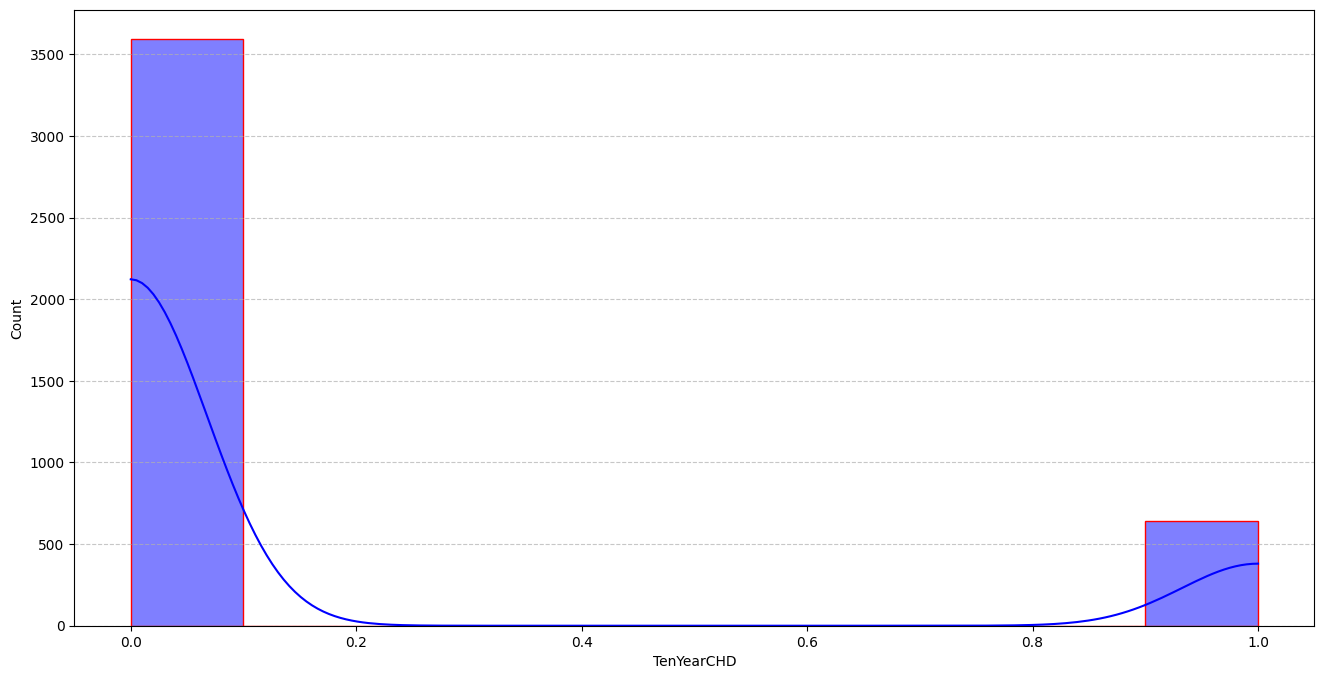

In [ ]:
def histogram(column):
  sns.set_palette('mako')
  plt.figure(figsize=(16,8))
  sns.histplot(data=df[column],bins=10, kde=True, color='blue', edgecolor='red')
  plt.grid(axis='y', linestyle='--',alpha=0.7)
  plt.show()

for x in df.select_dtypes(include=['int64','float64']).columns.to_list()[1:]:
  histogram(x)

Constructed Histograms for all columns containing float64 and int64

In [ ]:
df.corrwith(df['TenYearCHD'])

male               0.088428
age                0.225256
education         -0.054059
currentSmoker      0.019456
cigsPerDay         0.057884
BPMeds             0.087489
prevalentStroke    0.061810
prevalentHyp       0.177603
diabetes           0.097317
totChol            0.082184
sysBP              0.216429
diaBP              0.145299
BMI                0.075192
heartRate          0.022913
glucose            0.125544
TenYearCHD         1.000000
dtype: float64

We observe that the correlation with the target variable is quite weak, which I believe is due to a large number of outliers in some variables and, of course, the imbalance of classes.

In [ ]:
missing_values = df['education'].isnull().sum()
half_missing_values = missing_values // 2
df['education'].fillna(3, limit=half_missing_values, inplace=True)
df['education'].fillna(4, inplace=True)

In [ ]:
df.cigsPerDay.value_counts(normalize = False)

0.0     2144
20.0     734
30.0     217
15.0     210
10.0     143
9.0      130
5.0      121
3.0      100
40.0      80
1.0       67
43.0      56
25.0      55
35.0      22
2.0       18
6.0       18
7.0       12
8.0       11
60.0      11
4.0        9
18.0       8
17.0       7
50.0       6
23.0       6
11.0       5
45.0       3
13.0       3
12.0       3
16.0       3
14.0       2
19.0       2
38.0       1
29.0       1
70.0       1
Name: cigsPerDay, dtype: int64

<Axes: ylabel='cigsPerDay'>

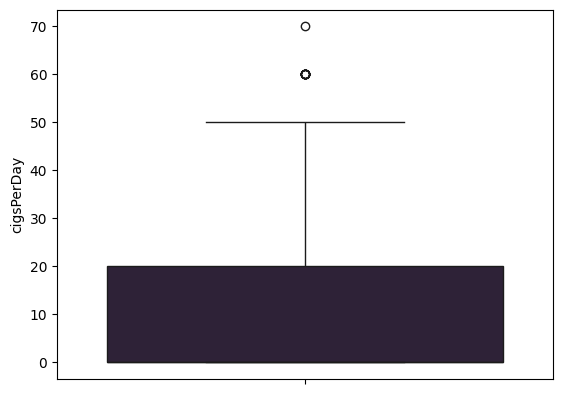

In [ ]:
sns.boxplot(data = df['cigsPerDay'])

<Axes: xlabel='cigsPerDay', ylabel='TenYearCHD'>

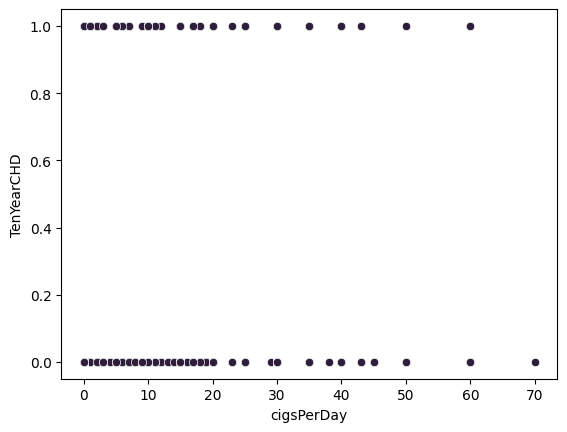

In [ ]:
sns.scatterplot(data = df, x = 'cigsPerDay', y = 'TenYearCHD')

In [ ]:
df.cigsPerDay.value_counts(normalize = False)

0.0     2144
20.0     734
30.0     217
15.0     210
10.0     143
9.0      130
5.0      121
3.0      100
40.0      80
1.0       67
43.0      56
25.0      55
35.0      22
2.0       18
6.0       18
7.0       12
8.0       11
60.0      11
4.0        9
18.0       8
17.0       7
50.0       6
23.0       6
11.0       5
45.0       3
13.0       3
12.0       3
16.0       3
14.0       2
19.0       2
38.0       1
29.0       1
70.0       1
Name: cigsPerDay, dtype: int64

In [ ]:
df['cigsPerDay'].replace(70, 60, inplace=True)
df['cigsPerDay'].replace(29, 30, inplace=True)
df['cigsPerDay'].replace(19, 20, inplace=True)
df['cigsPerDay'].replace(38, 40, inplace=True)
df['cigsPerDay'].replace(14, 15, inplace=True)
df['cigsPerDay'].replace(16, 15, inplace=True)
df['cigsPerDay'].replace(12, 10, inplace=True)
df['cigsPerDay'].replace(13, 15, inplace=True)
df['cigsPerDay'].replace(45, 43, inplace=True)
df['cigsPerDay'].replace(11, 10, inplace=True)
df['cigsPerDay'].replace(23, 25, inplace=True)
df['cigsPerDay'].replace(17, 15, inplace=True)
df['cigsPerDay'].replace(18, 20, inplace=True)
df['cigsPerDay'].replace(4, 5, inplace=True)
df['cigsPerDay'].replace(7, 9, inplace=True)
df['cigsPerDay'].replace(6, 5, inplace=True)
df['cigsPerDay'].replace(2, 1, inplace=True)
df['cigsPerDay'].replace(60, 50, inplace=True)

Imputation with approximate values

In [ ]:
df.cigsPerDay.value_counts(normalize = False)

0.0     2144
20.0     744
15.0     225
30.0     218
10.0     151
5.0      148
9.0      142
3.0      100
1.0       85
40.0      81
25.0      61
43.0      59
35.0      22
50.0      18
8.0       11
Name: cigsPerDay, dtype: int64

<Axes: ylabel='cigsPerDay'>

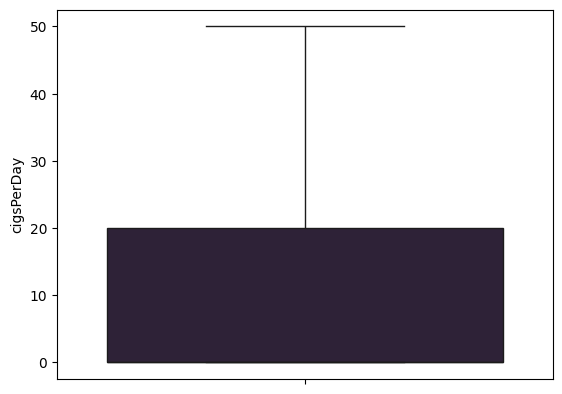

In [ ]:
sns.boxplot(data = df['cigsPerDay'])

<Axes: xlabel='cigsPerDay', ylabel='TenYearCHD'>

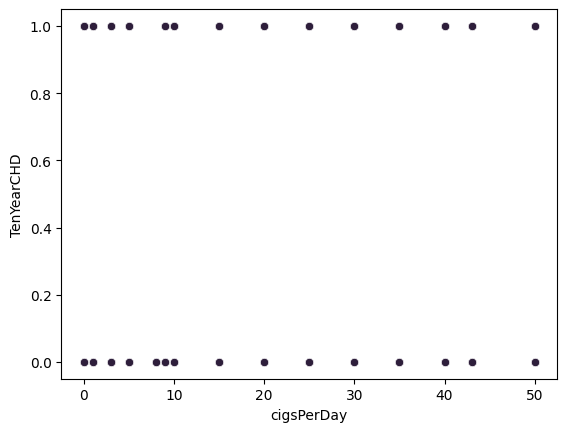

In [ ]:
sns.scatterplot(data = df, x = 'cigsPerDay', y = 'TenYearCHD')

In [ ]:
df['cigsPerDay'].fillna(df['cigsPerDay'].mean(), inplace = True)

In [ ]:
df.cigsPerDay.value_counts(normalize = False)

0.000000     2144
20.000000     744
15.000000     225
30.000000     218
10.000000     151
5.000000      148
9.000000      142
3.000000      100
1.000000       85
40.000000      81
25.000000      61
43.000000      59
8.973153       29
35.000000      22
50.000000      18
8.000000       11
Name: cigsPerDay, dtype: int64

In [ ]:
df.cigsPerDay.isna().sum()

0

In [ ]:
df['cigsPerDay'].replace(9.001663, 9, inplace=True)
df['cigsPerDay'].replace(8, 9, inplace=True)

In [ ]:
df.cigsPerDay.value_counts(normalize = False)

0.000000     2144
20.000000     744
15.000000     225
30.000000     218
9.000000      153
10.000000     151
5.000000      148
3.000000      100
1.000000       85
40.000000      81
25.000000      61
43.000000      59
8.973153       29
35.000000      22
50.000000      18
Name: cigsPerDay, dtype: int64

In [ ]:
df.BPMeds.isna().sum()

53

In [ ]:
df.BPMeds.value_counts(normalize = False)

0.0    4061
1.0     124
Name: BPMeds, dtype: int64

In [ ]:
missing_values_bp = df['BPMeds'].isnull().sum()
half_missing_values = missing_values // 2
df['BPMeds'].fillna(1, limit=half_missing_values, inplace=True)
df['BPMeds'].fillna(0, inplace=True)

In [ ]:
df.BPMeds.value_counts(normalize = False)

0.0    4062
1.0     176
Name: BPMeds, dtype: int64

In [ ]:
df.BPMeds.isna().sum()

0

In [ ]:
print(f'numbers of missing values: ', df.totChol.isna().sum())
print('\n', df.totChol.value_counts(normalize = False))

numbers of missing values:  50

 240.0    85
220.0    70
260.0    62
210.0    61
232.0    59
         ..
392.0     1
405.0     1
359.0     1
398.0     1
119.0     1
Name: totChol, Length: 248, dtype: int64


<Axes: ylabel='totChol'>

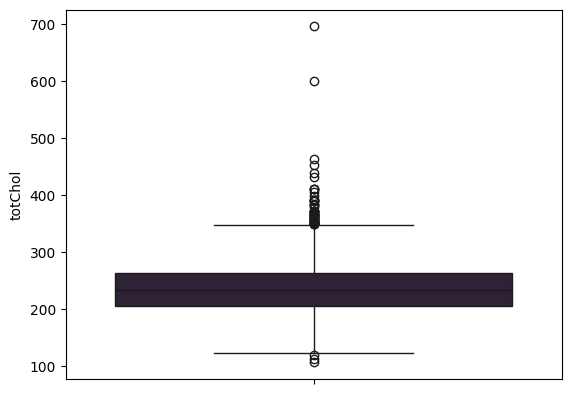

In [ ]:
sns.boxplot(df['totChol'])

<Axes: xlabel='totChol', ylabel='TenYearCHD'>

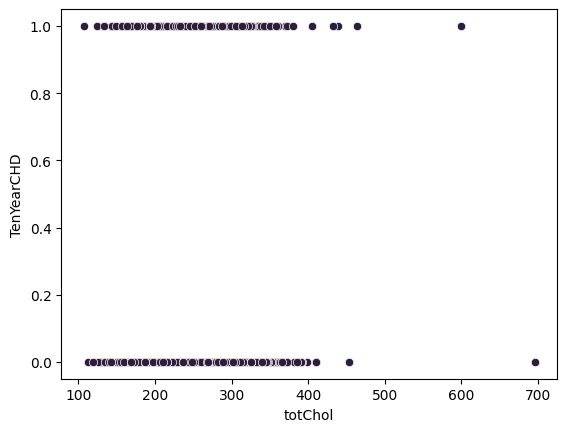

In [ ]:
sns.scatterplot(data = df, x = 'totChol', y = 'TenYearCHD')

In [ ]:
def detect_outliers_zscore_totChol(df, variable, threshold=3):
    mean_val_totChol = np.mean(df['totChol'])
    std_val_totChol = np.std(df['totChol'])
    z_scores_totChol = (df['totChol'] - mean_val_totChol) / std_val_totChol
    outliers_totChol = np.where(np.abs(z_scores_totChol) > threshold)[0]
    return ', '.join(map(str, outliers_totChol))

outliers_indices_totChol = detect_outliers_zscore_totChol(df, 'totChol')
print("outlier indices totChol:", outliers_indices_totChol )

outlier indices totChol: 194, 543, 617, 998, 1111, 1150, 1447, 1544, 1691, 1937, 2024, 2206, 2349, 2368, 2488, 2607, 2985, 3160, 3394, 3474, 3806, 3816, 3916, 4001


In [ ]:
std_deviation_totChol = df['totChol'].std()
mean_val_totChol = np.mean(df['totChol'])
z_scores_totChol = (df['totChol'] - mean_val_totChol) / std_deviation_totChol
for i, z in enumerate(z_scores_totChol):
    if z > 3:
        print(f"Z-score for {df['totChol'][i]}: {z}")

Z-score for 464.0: 5.097033202150784
Z-score for 439.0: 4.536373579792045
Z-score for 398.0: 3.616891799123713
Z-score for 372.0: 3.033805791870624
Z-score for 600.0: 8.147021547782325
Z-score for 392.0: 3.482333489757615
Z-score for 391.0: 3.4599071048632655
Z-score for 410.0: 3.8860084178559076
Z-score for 372.0: 3.033805791870624
Z-score for 410.0: 3.8860084178559076
Z-score for 390.0: 3.437480719968916
Z-score for 405.0: 3.7738764933841598
Z-score for 380.0: 3.2132168710254203
Z-score for 390.0: 3.437480719968916
Z-score for 371.0: 3.0113794069762743
Z-score for 382.0: 3.2580696408141194
Z-score for 432.0: 4.379388885531598
Z-score for 696.0: 10.299954497639884
Z-score for 382.0: 3.2580696408141194
Z-score for 453.0: 4.850342968312939
Z-score for 410.0: 3.8860084178559076
Z-score for 391.0: 3.4599071048632655
Z-score for 373.0: 3.0562321767649734
Z-score for 385.0: 3.325348795497168


In [ ]:
outliers_values_totChol = df.loc[[194, 543, 617, 998, 1111, 1150, 1447, 1544, 1691, 1937, 2024, 2206, 2349, 2368, 2488, 2607, 2985, 3160, 3394, 3474, 3806, 3816, 3916, 4001]]['totChol']
print(f'old values: \n', outliers_values_totChol)
print(f'\nCount Values totChol: ', outliers_values_totChol.count())

old values: 
 194     464.0
543     439.0
617     398.0
998     372.0
1111    600.0
1150    392.0
1447    391.0
1544    410.0
1691    372.0
1937    410.0
2024    390.0
2206    405.0
2349    380.0
2368    390.0
2488    371.0
2607    382.0
2985    432.0
3160    696.0
3394    382.0
3474    453.0
3806    410.0
3816    391.0
3916    373.0
4001    385.0
Name: totChol, dtype: float64

Count Values totChol:  24


We see that we have about 24 outliers here, which is too few; we will only change a few values that are from 4 or 5 standard deviations away from the average. The method of imputation with approximate values.


In [ ]:
df['totChol'].replace(696, 372, inplace = True)
df['totChol'].replace(600, 371, inplace = True)
df['totChol'].replace(463, 369, inplace = True)
df['totChol'].replace(439, 365, inplace = True)
df['totChol'].replace(453, 368, inplace = True)
df['totChol'].replace(464, 370, inplace = True)
df['totChol'].replace(432, 358, inplace = True)
df['totChol'].replace(398, 356, inplace = True)
df['totChol'].replace(410, 363, inplace = True)
df['totChol'].replace(405, 360, inplace = True)

In [ ]:
std_deviation_totChol = df['totChol'].std()
mean_val_totChol = np.mean(df['totChol'])
z_scores_totChol = (df['totChol'] - mean_val_totChol) / std_deviation_totChol
for i, z in enumerate(z_scores_totChol):
    if z > 3.5:
        print(f"Z-score for {df['totChol'][i]}: {z}")

Z-score for 392.0: 3.594619860416166
Z-score for 391.0: 3.5715097215867537
Z-score for 390.0: 3.5483995827573414
Z-score for 390.0: 3.5483995827573414
Z-score for 391.0: 3.5715097215867537


<Axes: ylabel='totChol'>

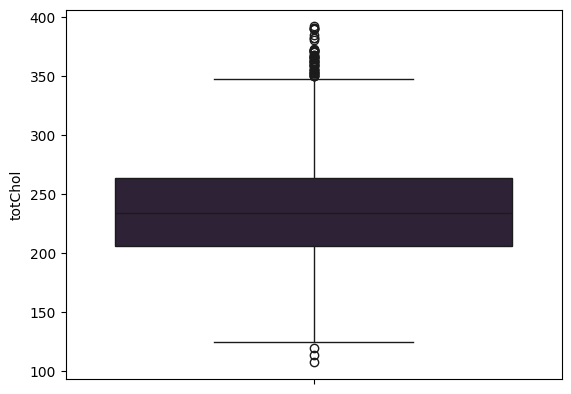

In [ ]:
sns.boxplot(df['totChol'])

<Axes: xlabel='totChol', ylabel='TenYearCHD'>

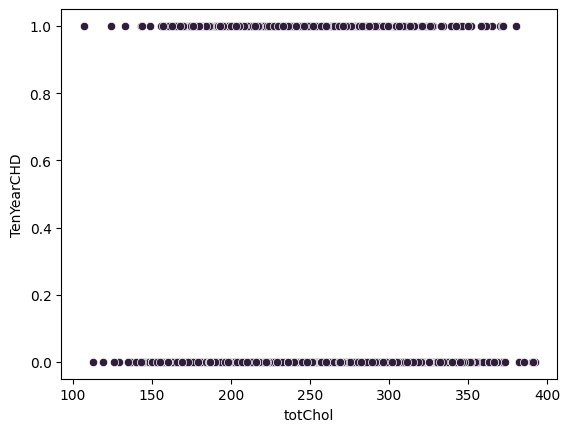

In [ ]:
sns.scatterplot(data = df, x = 'totChol', y = 'TenYearCHD')

In [ ]:
df['totChol'].isna().sum()

50

In [ ]:
df['totChol'].fillna(df['totChol'].mean(), inplace = True)

In [ ]:
df['totChol'].isna().sum()

0

<Axes: ylabel='BMI'>

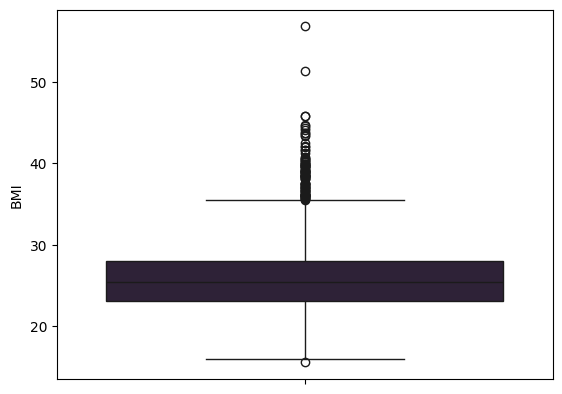

In [ ]:
sns.boxplot(df['BMI'])

<Axes: xlabel='BMI', ylabel='TenYearCHD'>

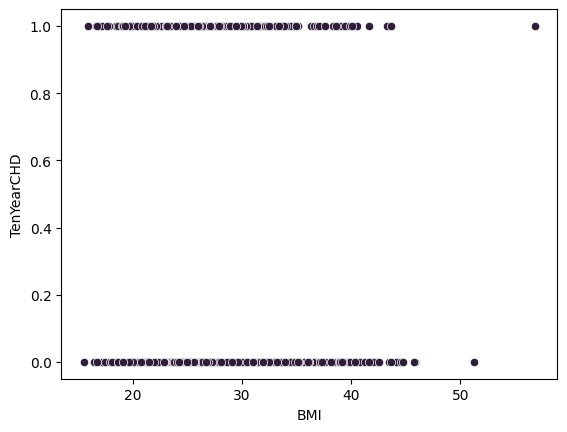

In [ ]:
sns.scatterplot(data = df, x = 'BMI', y = 'TenYearCHD')

In [ ]:
def detect_outliers_zscore_BMI(df, variable, threshold=3):
    mean_val_BMI = np.mean(df['BMI'])
    std_val_BMI = np.std(df['BMI'])
    z_scores_BMI = (df['BMI'] - mean_val_BMI) / std_val_BMI
    outliers_BMI = np.where(np.abs(z_scores_BMI) > threshold)[0]
    return ', '.join(map(str, outliers_BMI))

outliers_indices_BMI = detect_outliers_zscore_BMI(df, 'BMI')
print("outliers indices BMI:", outliers_indices_BMI)

outliers indices BMI: 35, 37, 78, 87, 108, 114, 143, 165, 249, 264, 409, 433, 481, 675, 750, 829, 833, 894, 969, 1183, 1286, 1520, 1525, 1715, 1853, 1985, 2019, 2162, 2167, 2170, 2180, 2245, 2262, 2307, 2373, 2388, 2492, 2657, 2668, 2697, 2883, 2907, 2930, 2986, 3094, 3366, 3522, 3581, 3648, 3657, 3659, 3678, 3738, 3899, 3927, 3952, 4001, 4132, 4215, 4228


In [ ]:
outlier_values_BMI = df.loc[[35, 37, 78, 87, 108, 114, 143, 165, 249, 264, 409, 433, 481, 675, 750, 829, 833, 894, 969, 1183, 1286, 1520, 1525, 1715, 1853, 1985, 2019, 2162, 2167, 2170, 2180, 2245, 2262, 2307, 2373, 2388, 2492, 2657, 2668, 2697, 2883, 2907, 2930, 2986, 3094, 3366, 3522, 3581, 3648, 3657, 3659, 3678, 3738, 3899, 3927, 3952, 4001, 4132, 4215, 4228]]['BMI']
print(f'Old Outliers values BMI \n', outlier_values_BMI)
print(f'\nCount Ourliers BMI: ', outlier_values_BMI.count())

Old Outliers values BMI 
 35      38.53
37      40.11
78      45.80
87      38.46
108     40.52
114     42.15
143     38.39
165     42.00
249     44.27
264     38.14
409     39.88
433     45.79
481     38.82
675     39.60
750     44.09
829     40.58
833     43.30
894     43.69
969     42.53
1183    38.88
1286    38.38
1520    38.75
1525    44.55
1715    39.64
1853    38.06
1985    39.91
2019    38.43
2162    44.71
2167    38.54
2170    39.04
2180    38.42
2245    39.53
2262    39.54
2307    43.48
2373    39.08
2388    39.69
2492    39.82
2657    56.80
2668    38.11
2697    40.21
2883    39.40
2907    40.81
2930    38.61
2986    39.21
3094    40.51
3366    38.31
3522    38.96
3581    39.94
3648    39.94
3657    39.22
3659    41.29
3678    40.08
3738    41.61
3899    40.38
3927    51.28
3952    38.94
4001    41.66
4132    38.17
4215    39.17
4228    43.67
Name: BMI, dtype: float64

Count Ourliers BMI:  60


Here we see about 60 values at a distance of 3 standard deviations; I will adjust them to a distance of 2.5.

In [ ]:
mean_value_BMI = df['BMI'].mean()
std_deviation_BMI = df['BMI'].std()
z_scores_BMI = (df['BMI'] - mean_value_BMI) / std_deviation_BMI
for i, z in enumerate(z_scores_BMI):
    if z > 2.8:
        print(f"Z-score for {df['BMI'][i]}: {z}")


Z-score for 38.53: 3.1195210670930287
Z-score for 40.11: 3.5067654278058757
Z-score for 45.8: 4.901335309107205
Z-score for 38.46: 3.1023646713652444
Z-score for 40.52: 3.607252888497185
Z-score for 42.15: 4.00675181758702
Z-score for 38.39: 3.08520827563746
Z-score for 42.0: 3.969988112456054
Z-score for 44.27: 4.5263455167713476
Z-score for 38.14: 3.023935433752516
Z-score for 39.88: 3.4503944132717277
Z-score for 45.79: 4.898884395431808
Z-score for 38.82: 3.190597563679564
Z-score for 37.41: 2.8450187354484777
Z-score for 37.48: 2.8621751311762624
Z-score for 39.6: 3.38176883036059
Z-score for 44.09: 4.4822290706141885
Z-score for 40.58: 3.6219583705495704
Z-score for 43.3: 4.288606890257763
Z-score for 43.69: 4.384192523598276
Z-score for 42.53: 4.099886537252136
Z-score for 38.88: 3.205303045731951
Z-score for 38.38: 3.0827573619620625
Z-score for 38.75: 3.1734411679517796
Z-score for 44.55: 4.594971099682484
Z-score for 39.64: 3.391572485062181
Z-score for 38.06: 3.0043281243493

In [ ]:
threshold_BMI = 2.8 * df['BMI'].std()

outliers_BMI = np.where(abs(df['BMI'] - df['BMI'].mean()) > threshold_BMI)[0]

for i in outliers_BMI:
    df['BMI'].iloc[i] = df['BMI'].mean() + 2.5 * df['BMI'].std()

In [ ]:
mean_value_BMI = df['BMI'].mean()
std_deviation_BMI = df['BMI'].std()
z_scores_BMI = (df['BMI'] - mean_value_BMI) / std_deviation_BMI
for i, z in enumerate(z_scores_BMI):
    if z > 3:
        print(f"Z-score for {df['BMI'][i]}: {z}")

<Axes: ylabel='BMI'>

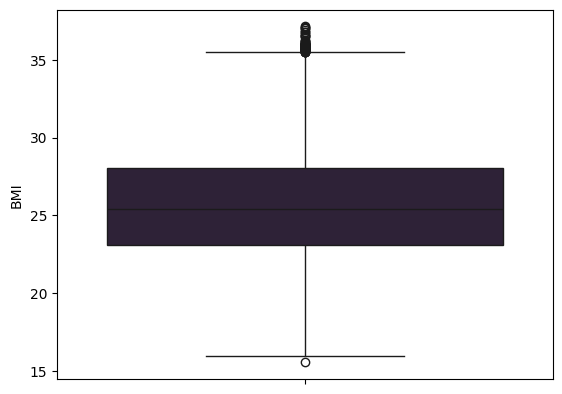

In [ ]:
sns.boxplot(df['BMI'])

<Axes: xlabel='BMI', ylabel='TenYearCHD'>

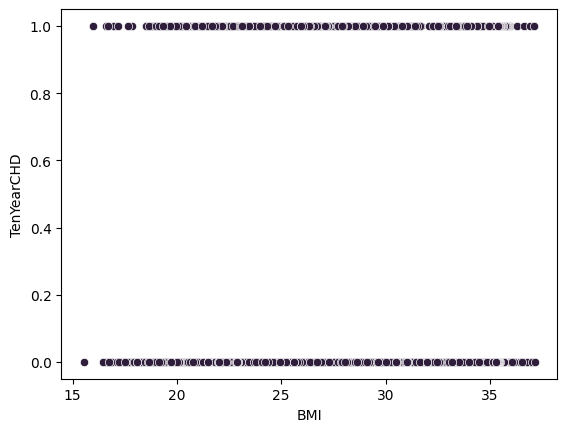

In [ ]:
sns.scatterplot(data = df, x = 'BMI', y = 'TenYearCHD')

In [ ]:
df['BMI'].isna().sum()

19

In [ ]:
df['BMI'].fillna(df['BMI'].mean(), inplace = True)

In [ ]:
df['BMI'].isna().sum()

0

In [ ]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

<Axes: ylabel='sysBP'>

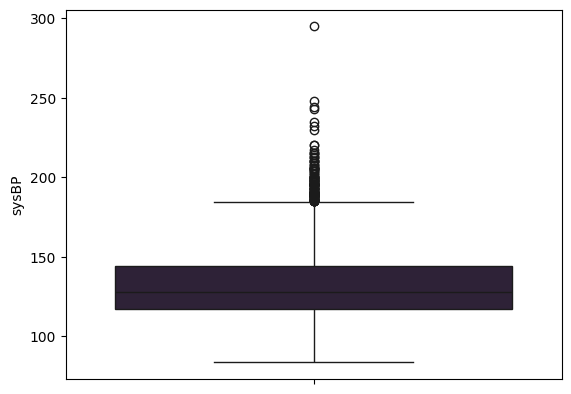

In [ ]:
sns.boxplot(df['sysBP'])

<Axes: xlabel='sysBP', ylabel='TenYearCHD'>

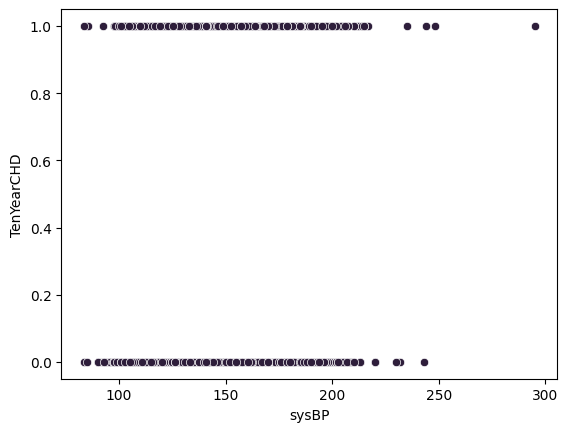

In [ ]:
sns.scatterplot(data = df, x = 'sysBP', y = 'TenYearCHD')

In [ ]:
def detect_outliers_zscore_sysBP(df, variable, threshold=3):
    mean_val_sysBP = np.mean(df['sysBP'])
    std_val_sysBP = np.std(df['sysBP'])
    z_scores_sysBP = (df['sysBP'] - mean_val_sysBP) / std_val_sysBP
    outliers_sysBP = np.where(np.abs(z_scores_sysBP) > threshold)[0]
    return ', '.join(map(str, outliers_sysBP))

outliers_indices_sysBP = detect_outliers_zscore_sysBP(df, 'sysBP')
print("outliers indices sysBP:", outliers_indices_sysBP)

outliers indices sysBP: 44, 87, 153, 249, 333, 369, 446, 481, 590, 664, 833, 864, 903, 924, 932, 1003, 1079, 1189, 1520, 1567, 1588, 1751, 1878, 1989, 2091, 2132, 2162, 2179, 2304, 2416, 2459, 2608, 2645, 2683, 2909, 2930, 3062, 3214, 3489, 3554, 3616, 3675, 3844, 3981, 4040, 4076, 4123, 4173


In [ ]:
old_values_sysBP = df.loc[[44, 87, 153, 249, 333, 369, 446, 481, 590, 664, 833, 864, 903, 924, 932, 1003, 1079, 1189, 1520, 1567, 1588, 1751, 1878, 1989, 2091, 2132, 2162, 2179, 2304, 2416, 2459, 2608, 2645, 2683, 2909, 2930, 3062, 3214, 3489, 3554, 3616, 3675, 3844, 3981, 4040, 4076, 4123, 4173]]['sysBP']

In [ ]:
print(f'out_values_sysBP \n', old_values_sysBP)
print(f'\nCount Outliers SYSBP: ', old_values_sysBP.count())

out_values_sysBP 
 44      206.0
87      200.0
153     212.0
249     200.0
333     204.0
369     215.0
446     209.0
481     295.0
590     220.0
664     205.5
833     200.0
864     244.0
903     213.0
924     206.0
932     199.0
1003    206.0
1079    201.0
1189    243.0
1520    199.0
1567    204.0
1588    217.0
1751    202.0
1878    200.0
1989    232.0
2091    235.0
2132    205.0
2162    220.0
2179    210.0
2304    199.0
2416    210.0
2459    202.5
2608    208.0
2645    205.0
2683    210.0
2909    204.0
2930    207.5
3062    215.0
3214    199.5
3489    248.0
3554    202.0
3616    230.0
3675    214.0
3844    215.0
3981    207.0
4040    213.0
4076    200.0
4123    206.0
4173    210.0
Name: sysBP, dtype: float64

Count Outliers SYSBP:  48


In [ ]:
mean_value_sysBP = df['sysBP'].mean()
std_deviation_sysBP = df['sysBP'].std()
z_scores_sysBP = (df['sysBP'] - mean_value_sysBP) / std_deviation_sysBP
for i, z in enumerate(z_scores_sysBP):
    if z > 3:
        print(f"Z-score for {df['sysBP'][i]}: {z}")

Z-score for 206.0: 3.3418309391938603
Z-score for 200.0: 3.0695751225030152
Z-score for 212.0: 3.6140867558847054
Z-score for 200.0: 3.0695751225030152
Z-score for 204.0: 3.251079000296912
Z-score for 215.0: 3.750214664230128
Z-score for 209.0: 3.477958847539283
Z-score for 295.0: 7.3802922201080605
Z-score for 220.0: 3.9770945114724987
Z-score for 205.5: 3.319142954469623
Z-score for 200.0: 3.0695751225030152
Z-score for 244.0: 5.066117778235879
Z-score for 213.0: 3.6594627253331797
Z-score for 206.0: 3.3418309391938603
Z-score for 199.0: 3.0241991530545413
Z-score for 206.0: 3.3418309391938603
Z-score for 201.0: 3.1149510919514896
Z-score for 243.0: 5.020741808787404
Z-score for 199.0: 3.0241991530545413
Z-score for 204.0: 3.251079000296912
Z-score for 217.0: 3.840966603127076
Z-score for 202.0: 3.160327061399964
Z-score for 200.0: 3.0695751225030152
Z-score for 232.0: 4.521606144854188
Z-score for 235.0: 4.657734053199611
Z-score for 205.0: 3.2964549697453864
Z-score for 220.0: 3.97

In [ ]:
threshold_sysBP = 3 * df['sysBP'].std()

outliers_sysBP = np.where(abs(df['sysBP'] - df['sysBP'].mean()) > threshold_sysBP)[0]

for i in outliers_sysBP:
    df['sysBP'].iloc[i] = df['sysBP'].mean() + 2 * df['sysBP'].std()

<Axes: ylabel='sysBP'>

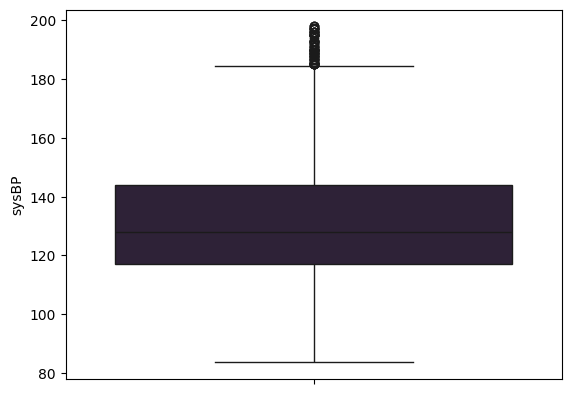

In [ ]:
sns.boxplot(df['sysBP'])

<Axes: xlabel='sysBP', ylabel='TenYearCHD'>

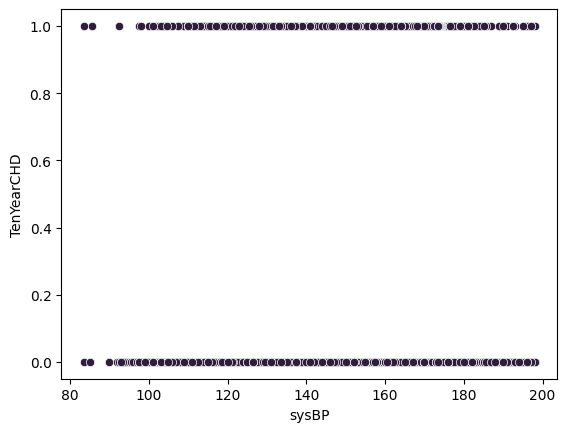

In [ ]:
sns.scatterplot(data = df, x = 'sysBP', y = 'TenYearCHD')

In [ ]:
df['sysBP'].isna().sum()

0

<Axes: ylabel='diaBP'>

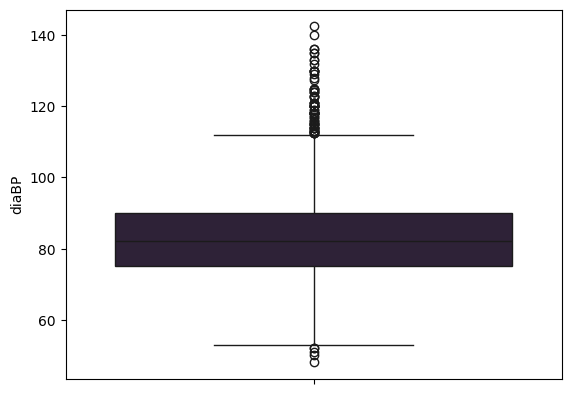

In [ ]:
sns.boxplot(df['diaBP'])

<Axes: xlabel='diaBP', ylabel='TenYearCHD'>

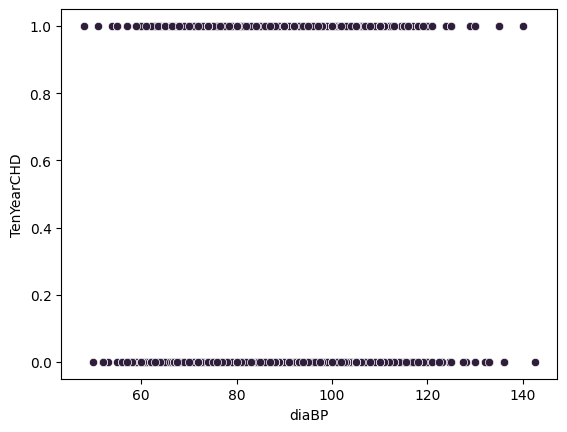

In [ ]:
sns.scatterplot(data = df, x = df['diaBP'], y = 'TenYearCHD')

In [ ]:
def detect_outliers_zscore_diaBP(df, variable, threshold=3):
    mean_val_diaBP = np.mean(df['diaBP'])
    std_val_diaBP = np.std(df['diaBP'])
    z_scores_diaBP = (df['diaBP'] - mean_val_diaBP) / std_val_diaBP
    outliers_diaBP = np.where(np.abs(z_scores_diaBP) > threshold)[0]
    return ', '.join(map(str, outliers_diaBP))

outliers_indices_diaBP = detect_outliers_zscore_diaBP(df, 'diaBP')
print("outliers indices diaBP:", outliers_indices_diaBP)

outliers indices diaBP: 28, 158, 249, 407, 409, 423, 446, 481, 531, 833, 864, 1189, 1608, 1614, 1751, 1760, 1808, 1878, 1989, 2088, 2093, 2179, 2307, 2416, 2608, 2657, 2683, 2872, 3062, 3322, 3489, 3532, 3554, 3635, 3953, 3981, 4040, 4075, 4076, 4173, 4228


In [ ]:
values_diaBP = df.loc[[28, 158, 249, 407, 409, 423, 446, 481, 531, 833, 864, 1189, 1608, 1614, 1751, 1760, 1808, 1878, 1989, 2088, 2093, 2179, 2307, 2416, 2608, 2657, 2683, 2872, 3062, 3322, 3489, 3532, 3554, 3635, 3953, 3981, 4040, 4075, 4076, 4173, 4228]]['diaBP']
print(values_diaBP)
print(f'\nCount Values_diaBP: ', values_diaBP.count())

28      121.0
158     124.5
249     122.5
407     123.0
409     120.0
423     120.0
446     133.0
481     135.0
531     121.0
833     140.0
864     124.0
1189    142.5
1608    120.0
1614    119.0
1751    132.0
1760    124.0
1808    123.0
1878    120.0
1989    136.0
2088    120.0
2093    128.0
2179    120.0
2307    125.0
2416    130.0
2608    136.0
2657    130.0
2683    135.0
2872    121.0
3062    129.0
3322    120.0
3489    130.0
3532    119.0
3554    124.0
3635    121.0
3953    130.0
3981    122.5
4040    133.0
4075    125.0
4076    125.0
4173    127.5
4228    130.0
Name: diaBP, dtype: float64

Count Values_diaBP:  41


Значений всего 41, я изменю лишь несколько значений

In [ ]:
mean_val_diaBP = np.mean(df['diaBP'])
std_val_diaBP = np.std(df['diaBP'])
z_scores_diaBP = (df['diaBP'] - mean_val_diaBP) / std_val_diaBP
for i, z in enumerate(z_scores_diaBP):
  if z > 3:
    print(f"Z-score for values: {df['diaBP'][i]}: {z}")

Z-score for values: 121.0: 3.1996905336592056
Z-score for values: 124.5: 3.493574943353389
Z-score for values: 122.5: 3.325640994956713
Z-score for values: 123.0: 3.367624482055882
Z-score for values: 120.0: 3.1157235594608674
Z-score for values: 120.0: 3.1157235594608674
Z-score for values: 133.0: 4.207294224039263
Z-score for values: 135.0: 4.375228172435939
Z-score for values: 121.0: 3.1996905336592056
Z-score for values: 140.0: 4.795063043427629
Z-score for values: 124.0: 3.45159145625422
Z-score for values: 142.5: 5.004980478923475
Z-score for values: 120.0: 3.1157235594608674
Z-score for values: 119.0: 3.0317565852625292
Z-score for values: 132.0: 4.123327249840925
Z-score for values: 124.0: 3.45159145625422
Z-score for values: 123.0: 3.367624482055882
Z-score for values: 120.0: 3.1157235594608674
Z-score for values: 136.0: 4.459195146634277
Z-score for values: 120.0: 3.1157235594608674
Z-score for values: 128.0: 3.7874593530475726
Z-score for values: 120.0: 3.1157235594608674
Z-

In [ ]:
threshold_diaBP = 3 * df['diaBP'].std()

outliers_diaBP = np.where(abs(df['diaBP'] - df['diaBP'].mean()) > threshold_diaBP)[0]

for i in outliers_diaBP:
    df['diaBP'].iloc[i] = df['diaBP'].mean() + 2.5 * df['diaBP'].std()

<Axes: ylabel='diaBP'>

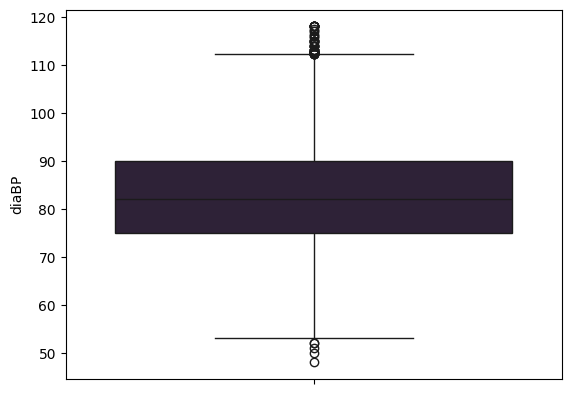

In [ ]:
sns.boxplot(df['diaBP'])

In [ ]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

<Axes: ylabel='heartRate'>

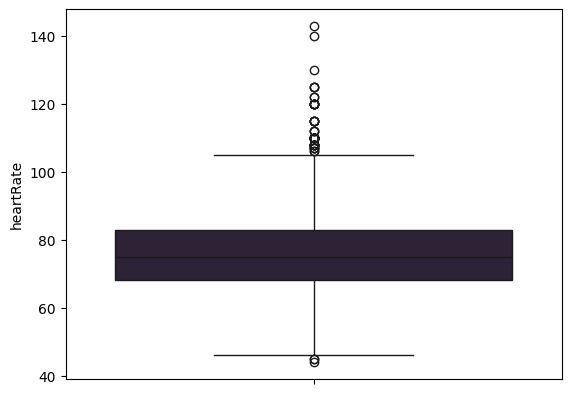

In [ ]:
sns.boxplot(df['heartRate'])

<Axes: xlabel='heartRate', ylabel='TenYearCHD'>

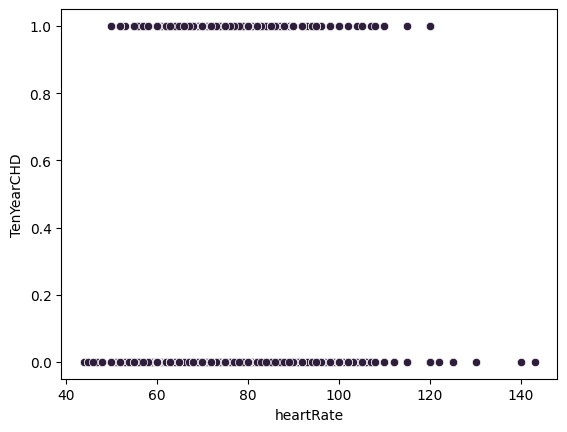

In [ ]:
sns.scatterplot(data = df, x = 'heartRate', y = 'TenYearCHD')

In [ ]:
def detect_outliers_zscore_heartrate(df, variable, treshold = 3):
  mean_val_heartrate = df['heartRate'].mean()
  std_val_heartrate = df['heartRate'].std()
  z_score_heartrate = (df['heartRate'] - mean_val_heartrate) / std_val_heartrate
  outliers_heartrate = np.where(np.abs(z_score_heartrate) > treshold)[0]
  return ', '.join(map(str, outliers_heartrate))

outliers_indices_heartrate = detect_outliers_zscore_heartrate(df, 'heartRate')
print(f'Outliers indices heartRate: ', outliers_indices_heartrate)

Outliers indices heartRate:  339, 358, 1008, 1022, 1470, 2237, 2482, 2492, 2663, 2733, 2922, 3142, 3225, 3233, 3242, 3585, 3747, 3819, 3862, 3901, 4053, 4070, 4164


In [ ]:
outliers_values_heartrate = df.loc[[339, 358, 1008, 1022, 1470, 2237, 2482, 2492, 2663, 2733, 2922, 3142, 3225, 3233, 3242, 3585, 3747, 3819, 3862, 3901, 4053, 4070, 4164]]['heartRate']
print(f'Outliers HearRate \n', outliers_values_heartrate)
print(f'\nCount outliers HeartRate:', outliers_values_heartrate.count())

Outliers HearRate 
 339     140.0
358     130.0
1008    112.0
1022    125.0
1470    112.0
2237    122.0
2482    120.0
2492    120.0
2663    120.0
2733    115.0
2922    120.0
3142    143.0
3225    120.0
3233    115.0
3242    115.0
3585    115.0
3747    120.0
3819    115.0
3862    122.0
3901    120.0
4053    125.0
4070    125.0
4164    112.0
Name: heartRate, dtype: float64

Count outliers HeartRate: 23


In [ ]:
mean_val_heartrate = df['heartRate'].mean()
std_val_heartrate = df['heartRate'].std()
z_score_heartrate = (df['heartRate'] - mean_val_heartrate) / std_val_heartrate
for i, z in enumerate(z_score_heartrate):
  if z > 3:
    print(f"Z-score for values heartrate: {df['diaBP'][i]}: {z}")

Z-score for values heartrate: 82.0: 5.331606246565855
Z-score for values heartrate: 79.0: 4.500115797594468
Z-score for values heartrate: 96.5: 3.0034329894459724
Z-score for values heartrate: 74.0: 4.0843705731087745
Z-score for values heartrate: 91.0: 3.0034329894459724
Z-score for values heartrate: 84.0: 3.834923438417359
Z-score for values heartrate: 84.0: 3.6686253486230815
Z-score for values heartrate: 82.0: 3.6686253486230815
Z-score for values heartrate: 90.0: 3.6686253486230815
Z-score for values heartrate: 115.0: 3.2528801241373886
Z-score for values heartrate: 69.0: 3.6686253486230815
Z-score for values heartrate: 94.0: 5.581053381257271
Z-score for values heartrate: 92.0: 3.6686253486230815
Z-score for values heartrate: 95.0: 3.2528801241373886
Z-score for values heartrate: 93.0: 3.2528801241373886
Z-score for values heartrate: 89.0: 3.2528801241373886
Z-score for values heartrate: 85.0: 3.6686253486230815
Z-score for values heartrate: 113.0: 3.2528801241373886
Z-score for 

In [ ]:
threshold_heartRate = 3 * df['heartRate'].std()

outliers_heartRate = np.where(abs(df['heartRate'] - df['heartRate'].mean()) > threshold_diaBP)[0]

for i in outliers_heartRate:
    df['heartRate'].iloc[i] = df['heartRate'].mean() + 2.5 * df['heartRate'].std()

<Axes: ylabel='heartRate'>

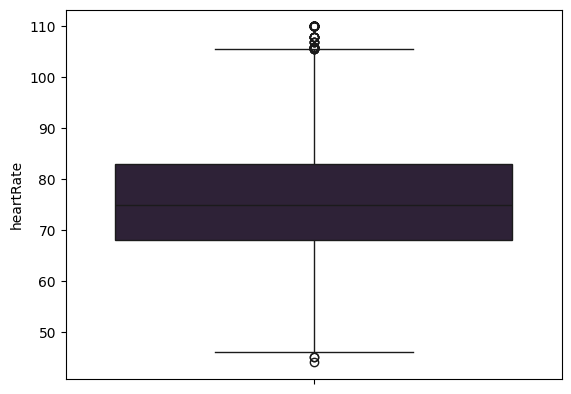

In [ ]:
sns.boxplot(df['heartRate'])

In [ ]:
mean_val_heartrate = df['heartRate'].mean()
std_val_heartrate = df['heartRate'].std()
z_score_heartrate = (df['heartRate'] - mean_val_heartrate) / std_val_heartrate
for i, z in enumerate(z_score_heartrate):
  if z > 2.4:
    print(f"Z-score for values heartrate: {df['diaBP'][i]}: {z}")

Z-score for values heartrate: 86.5: 2.9114787971198557
Z-score for values heartrate: 82.5: 2.485886167971511
Z-score for values heartrate: 98.0: 2.9114787971198557
Z-score for values heartrate: 82.0: 2.5663584689238417
Z-score for values heartrate: 79.0: 2.5589660542529726
Z-score for values heartrate: 93.0: 2.741241745460518
Z-score for values heartrate: 112.59109364636085: 2.4007676421418425
Z-score for values heartrate: 99.0: 2.9114787971198557
Z-score for values heartrate: 78.0: 2.485886167971511
Z-score for values heartrate: 84.5: 2.9114787971198557
Z-score for values heartrate: 93.0: 2.485886167971511
Z-score for values heartrate: 80.0: 2.485886167971511
Z-score for values heartrate: 108.0: 2.741241745460518
Z-score for values heartrate: 93.0: 2.485886167971511
Z-score for values heartrate: 68.0: 2.9114787971198557
Z-score for values heartrate: 79.0: 2.57100469380118
Z-score for values heartrate: 91.0: 2.9114787971198557
Z-score for values heartrate: 80.0: 2.4007676421418425
Z-sc

In [ ]:
df['heartRate'].isna().sum()

1

In [ ]:
df['heartRate'].fillna(df['heartRate'].mean(), inplace = True)

In [ ]:
df['heartRate'].isna().sum()

0

In [ ]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
for x in df.select_dtypes(include=['int64', 'float64']).columns.to_list():
  print(df[x].value_counts(),'\n\n')

0    2419
1    1819
Name: male, dtype: int64 


40    191
46    182
42    180
41    174
48    173
39    169
44    166
45    162
43    159
52    149
51    146
55    145
38    144
47    141
50    140
53    139
54    132
49    132
57    123
56    123
59    119
58    117
60    111
63    110
61    110
62     99
64     93
37     92
36     84
65     57
67     45
35     42
66     38
34     18
68     18
69      7
33      5
70      2
32      1
Name: age, dtype: int64 


1.0    1720
2.0    1253
3.0     739
4.0     526
Name: education, dtype: int64 


0    2144
1    2094
Name: currentSmoker, dtype: int64 


0.000000     2144
20.000000     744
15.000000     225
30.000000     218
9.000000      153
10.000000     151
5.000000      148
3.000000      100
1.000000       85
40.000000      81
25.000000      61
43.000000      59
8.973153       29
35.000000      22
50.000000      18
Name: cigsPerDay, dtype: int64 


0.0    4062
1.0     176
Name: BPMeds, dtype: int64 


0    4213
1      25
Name: prevalentStro

<Axes: ylabel='glucose'>

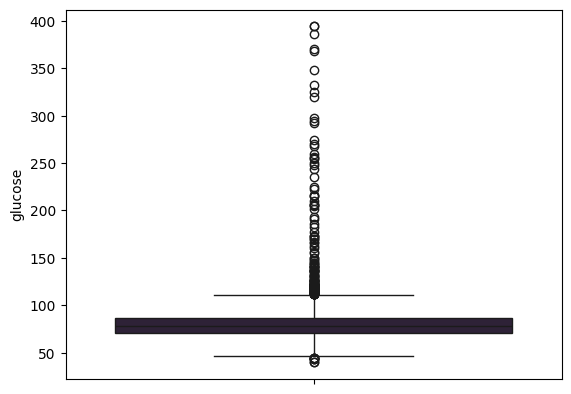

In [ ]:
sns.boxplot(df['glucose'])

<Axes: xlabel='glucose', ylabel='TenYearCHD'>

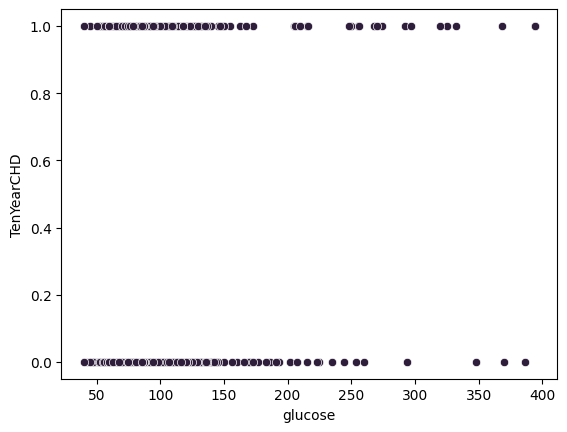

In [ ]:
sns.scatterplot(data = df, x = 'glucose', y = 'TenYearCHD')

In [ ]:
mean_val_glucose = df['glucose'].mean()
std_val_glucose = df['glucose'].std()
z_score_glucose = (df['glucose'] - mean_val_glucose) / std_val_glucose
for i, z in enumerate(z_score_glucose):
  if z > 3:
    print(f"Z-score for glucose values: {df['glucose'][i]}: {z}")

Z-score for glucose values: 225.0: 5.969668512641852
Z-score for glucose values: 215.0: 5.552306210649197
Z-score for glucose values: 202.0: 5.009735218058745
Z-score for glucose values: 160.0: 3.256813549689594
Z-score for glucose values: 205.0: 5.134943908656542
Z-score for glucose values: 216.0: 5.594042440848463
Z-score for glucose values: 163.0: 3.3820222402873905
Z-score for glucose values: 172.0: 3.75764831208078
Z-score for glucose values: 186.0: 4.341955534870497
Z-score for glucose values: 223.0: 5.886196052243322
Z-score for glucose values: 325.0: 10.143291532568403
Z-score for glucose values: 156.0: 3.089868628892532
Z-score for glucose values: 268.0: 7.764326411210269
Z-score for glucose values: 274.0: 8.014743792405863
Z-score for glucose values: 292.0: 8.765995935992642
Z-score for glucose values: 255.0: 7.221755418619818
Z-score for glucose values: 206.0: 5.176680138855807
Z-score for glucose values: 297.0: 8.974677086988969
Z-score for glucose values: 173.0: 3.79938454

In [ ]:
def outliers_indices_glucose(df, variable, treshold = 3):
  mean_val_glucose = df['glucose'].mean()
  std_val_glucose = df['glucose'].std()
  z_score_glucose = (df['glucose'] - mean_val_glucose) / std_val_glucose
  outliers_glucose = np.where(np.abs(z_score_glucose) > treshold)[0]
  return ', '.join(map(str, outliers_glucose))

outliers_indices_glucose = outliers_indices_glucose(df, 'glucose')
print(f'Outliers Indices for Glucose: ', outliers_indices_glucose)



Outliers Indices for Glucose:  37, 44, 66, 443, 763, 952, 965, 1068, 1238, 1268, 1363, 1456, 1485, 1649, 1674, 1931, 1997, 2091, 2234, 2378, 2406, 2498, 2503, 2649, 2801, 2855, 2891, 2893, 2909, 2961, 3002, 3112, 3327, 3458, 3606, 3680, 3749, 3763, 3817, 3844, 3849, 3868, 3971, 3974, 4042, 4064, 4076, 4084, 4096, 4228


In [ ]:
Outliers_values_glucose = df.loc[[37, 44, 66, 443, 763, 952, 965, 1068, 1238, 1268, 1363, 1456, 1485, 1649, 1674, 1931, 1997, 2091, 2234, 2378, 2406, 2498, 2503, 2649, 2801, 2855, 2891, 2893, 2909, 2961, 3002, 3112, 3327, 3458, 3606, 3680, 3749, 3763, 3817, 3844, 3849, 3868, 3971, 3974, 4042, 4064, 4076, 4084, 4096, 4228]]['glucose']
print(f'Outliers for glucose: \n', Outliers_values_glucose )
print(f'\nCount Outliers for glucose: ', Outliers_values_glucose.count())

Outliers for glucose: 
 37      225.0
44      215.0
66      202.0
443     160.0
763     205.0
952     216.0
965     163.0
1068    172.0
1238    186.0
1268    223.0
1363    325.0
1456    156.0
1485    268.0
1649    274.0
1674    292.0
1931    255.0
1997    206.0
2091    297.0
2234    173.0
2378    206.0
2406    386.0
2498    155.0
2503    215.0
2649    170.0
2801    320.0
2855    170.0
2891    254.0
2893    394.0
2909    394.0
2961    270.0
3002    244.0
3112    183.0
3327    167.0
3458    207.0
3606    177.0
3680    250.0
3749    294.0
3763    166.0
3817    332.0
3844    368.0
3849    348.0
3868    248.0
3971    370.0
3974    173.0
4042    193.0
4064    191.0
4076    256.0
4084    235.0
4096    210.0
4228    260.0
Name: glucose, dtype: float64

Count Outliers for glucose:  50


In [ ]:
treshold_for_change  = 3 * df['glucose'].std()
outliers_for_change = np.where(np.abs(df['glucose'] - df['glucose'].mean()) > treshold_for_change)[0]

for i in outliers_for_change:
  df['glucose'].iloc[i] = df['glucose'].mean() + 2.3 * df['glucose'].std()

<Axes: ylabel='glucose'>

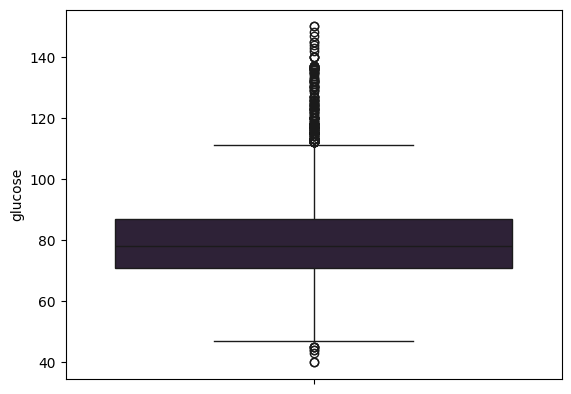

In [ ]:
sns.boxplot(df['glucose'])

<Axes: xlabel='glucose', ylabel='TenYearCHD'>

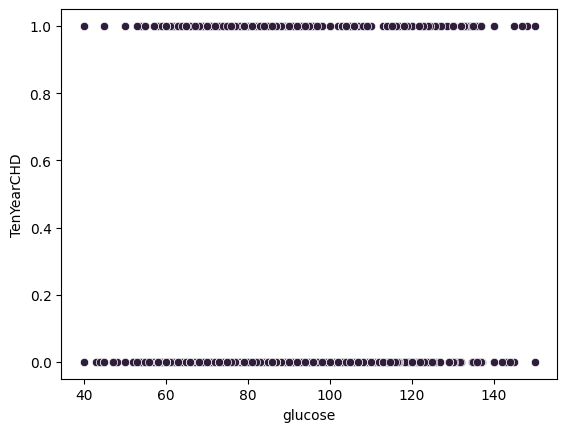

In [ ]:
sns.scatterplot(data = df, x = 'glucose', y = 'TenYearCHD')

In [ ]:
df['glucose'].isna().sum()

388

In [ ]:
df['glucose'].fillna(df['glucose'].mean(), inplace = True)

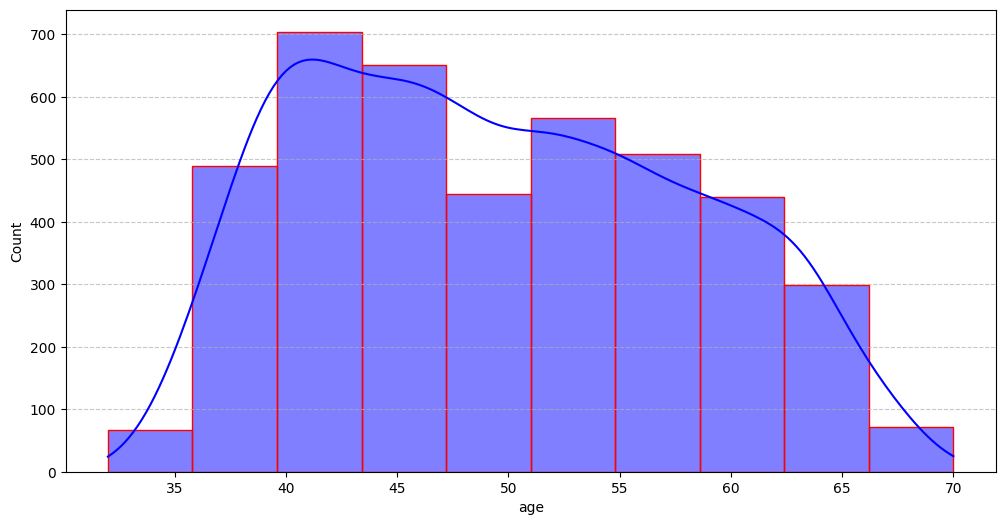

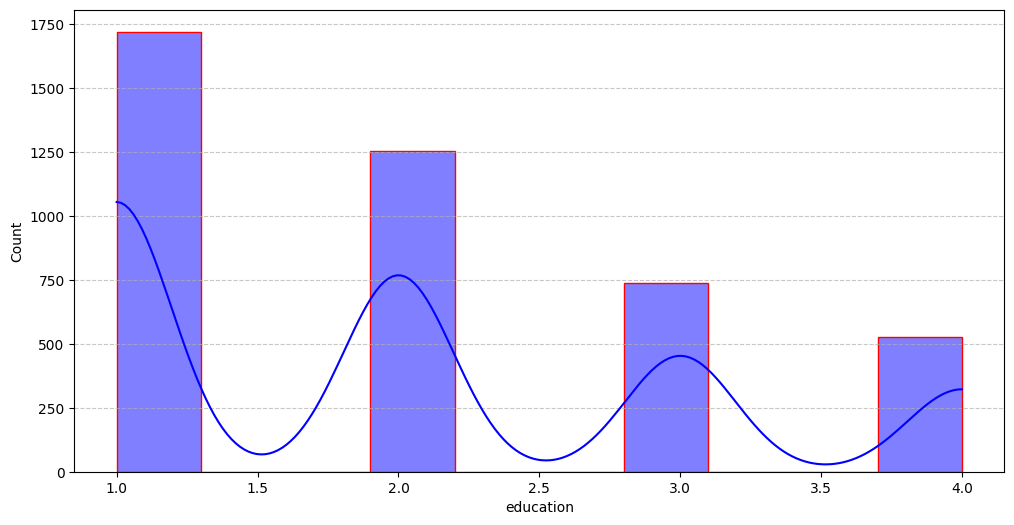

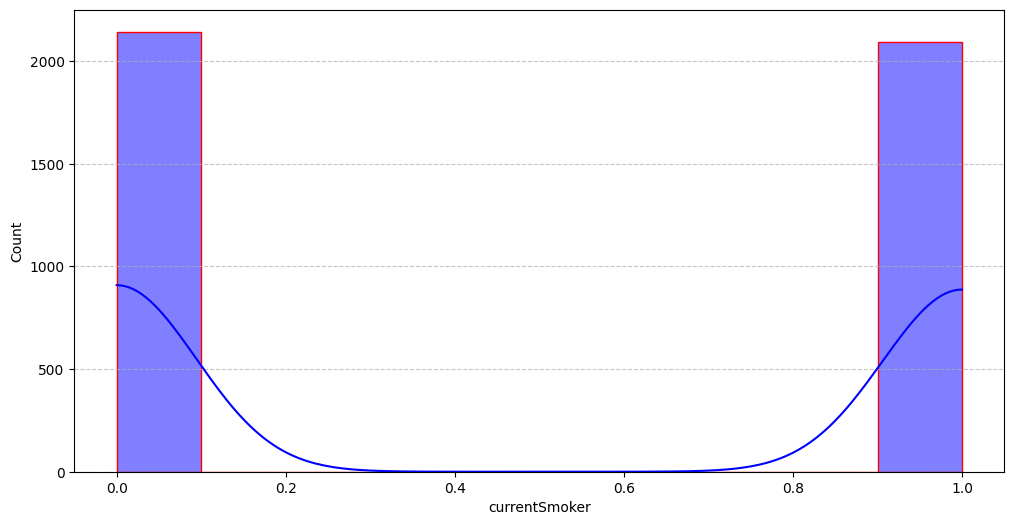

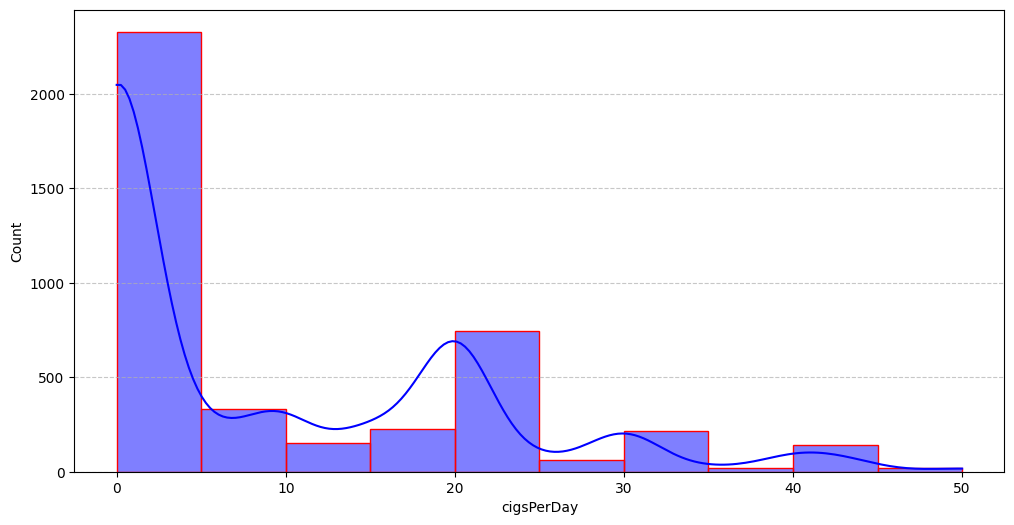

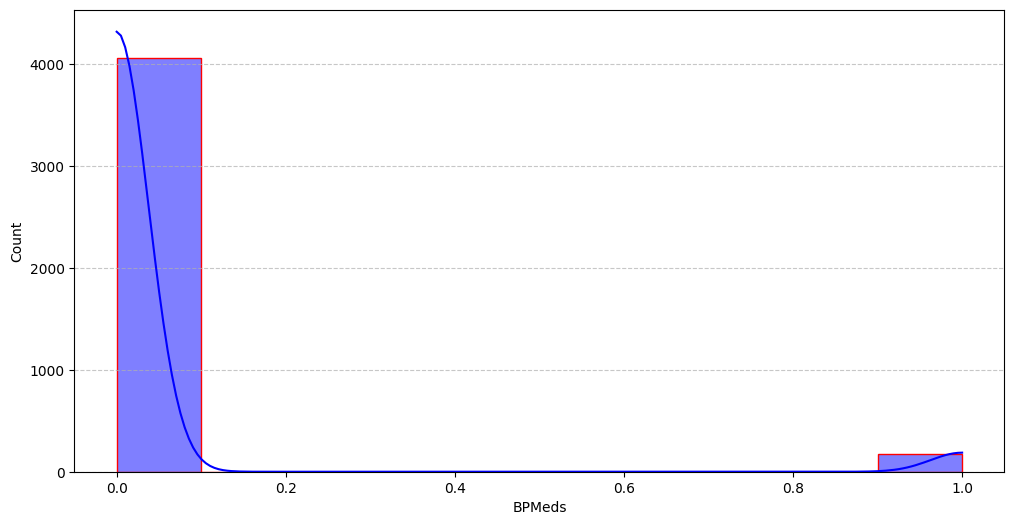

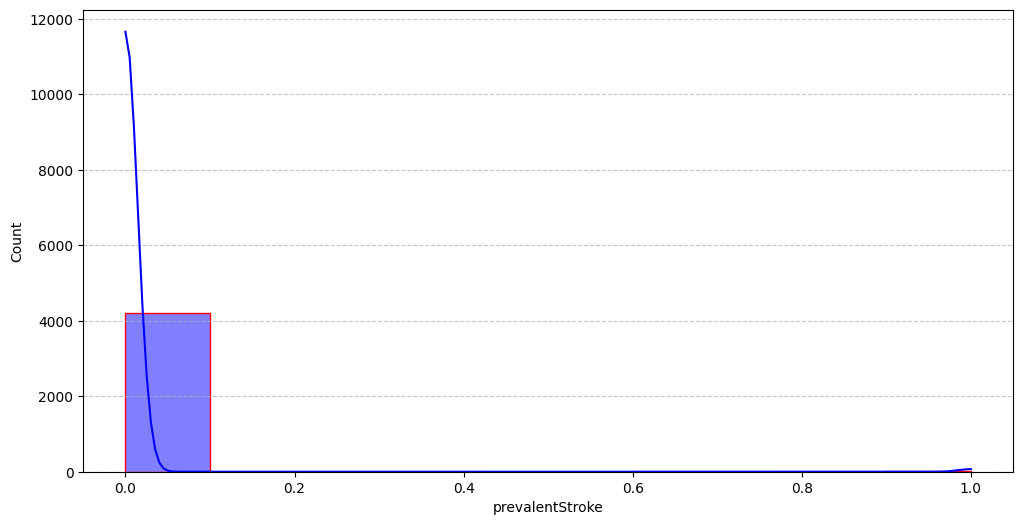

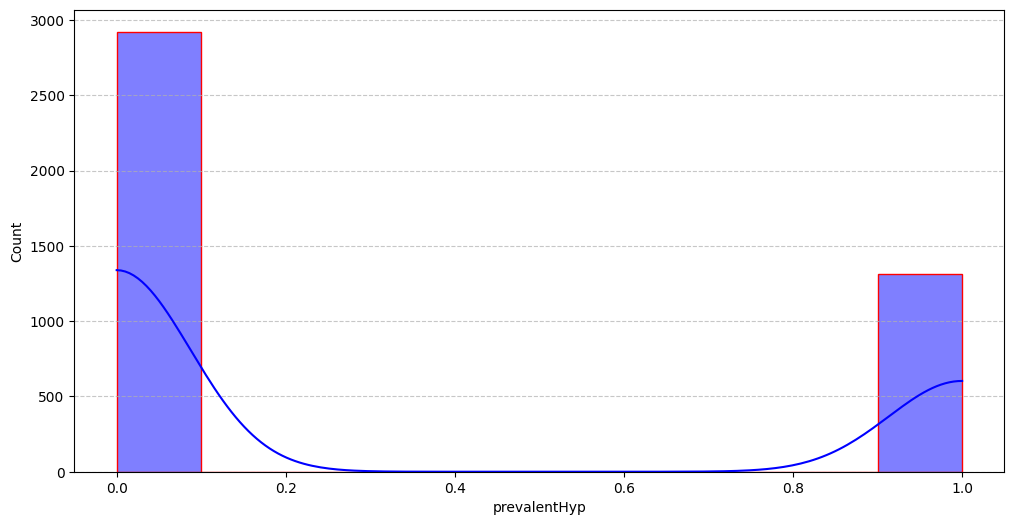

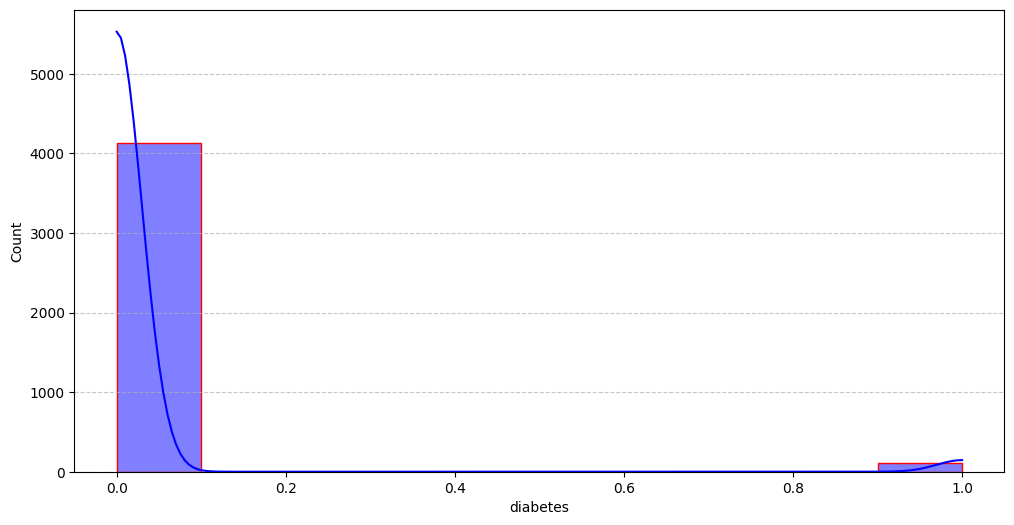

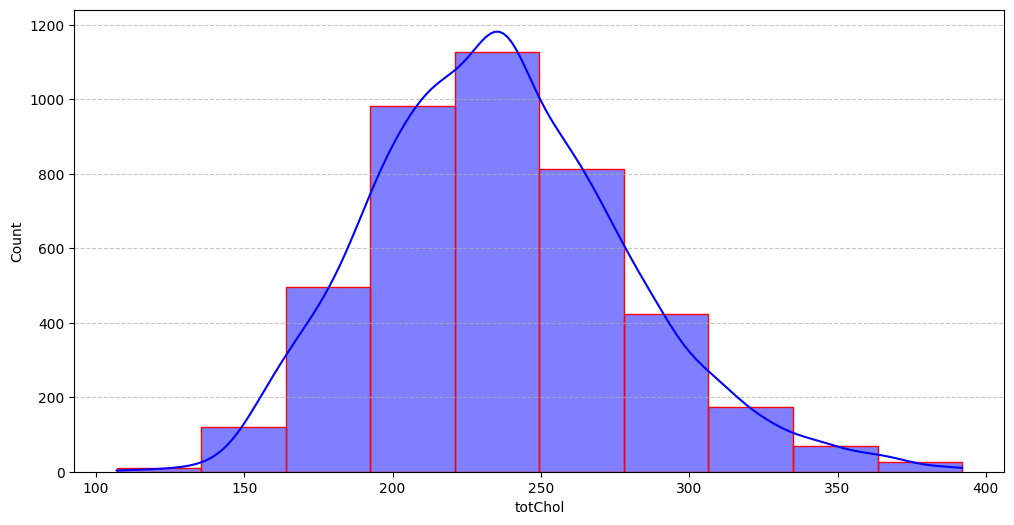

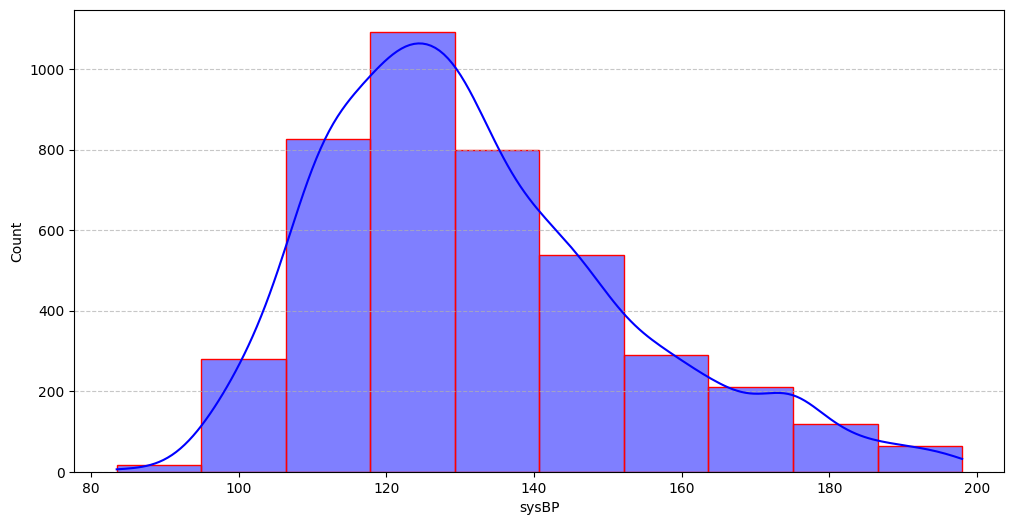

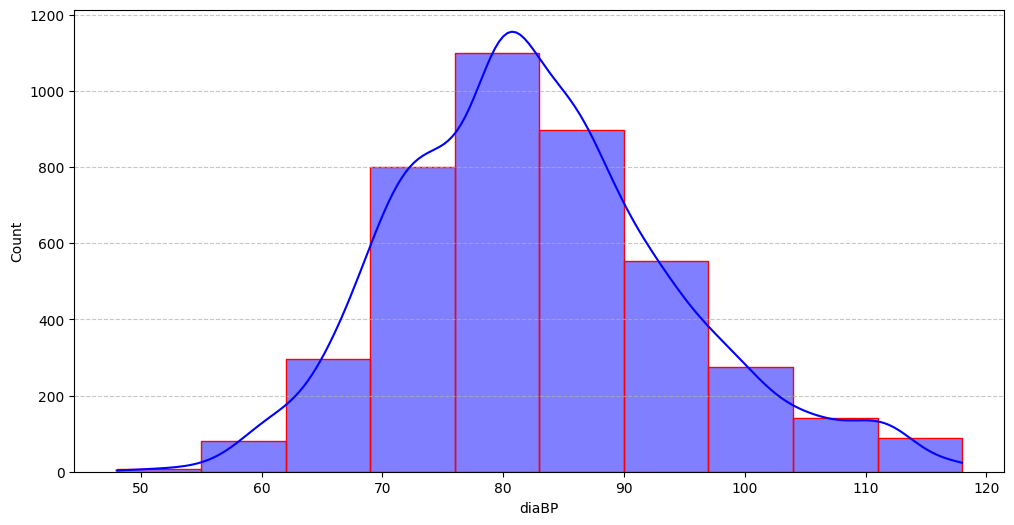

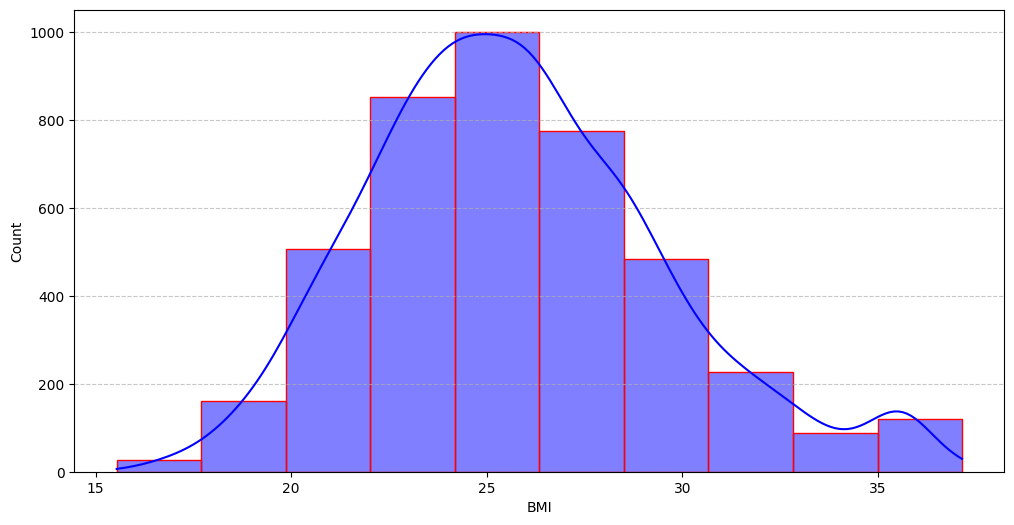

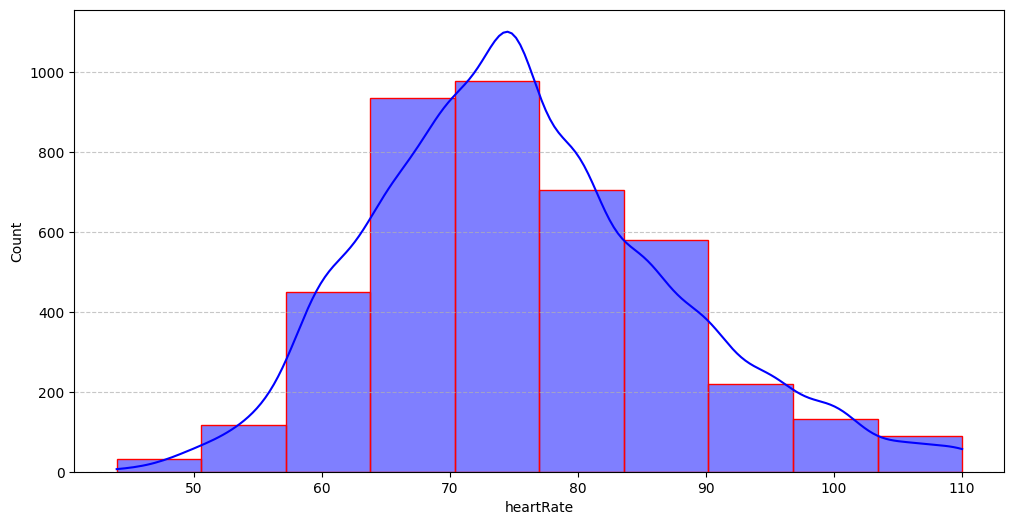

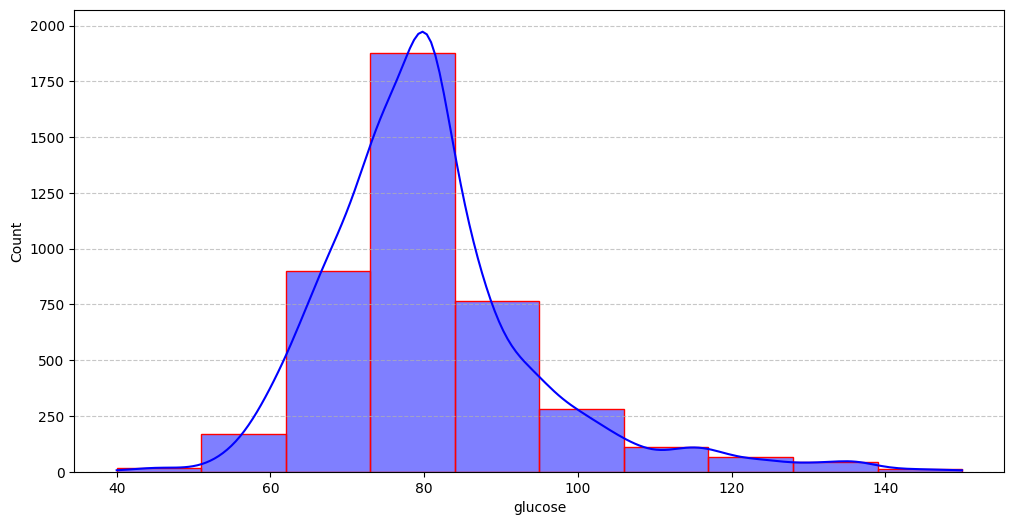

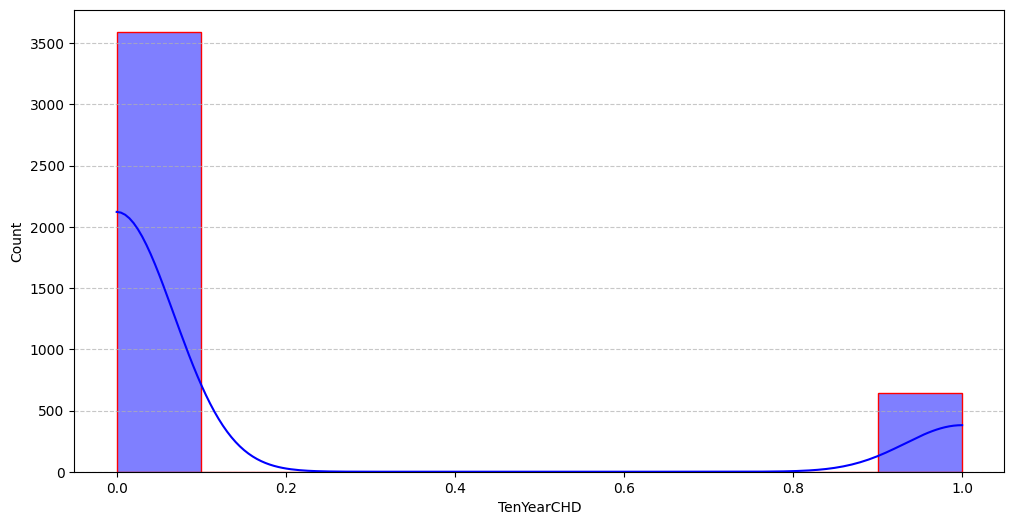

In [ ]:
def histogram(column):
  sns.set_palette('mako')
  plt.figure(figsize=(12,6))
  sns.histplot(data=df[column],bins=10, kde=True, color='blue', edgecolor='red')
  plt.grid(axis='y', linestyle='--',alpha=0.7)
  plt.show()

for x in df.select_dtypes(include=['int64','float64']).columns.to_list()[1:]:
  histogram(x)

In [ ]:
for col in df.columns:
    print('The number of missing values in %s = %d'%(col, df[col].isna().sum()))

The number of missing values in male = 0
The number of missing values in age = 0
The number of missing values in education = 0
The number of missing values in currentSmoker = 0
The number of missing values in cigsPerDay = 0
The number of missing values in BPMeds = 0
The number of missing values in prevalentStroke = 0
The number of missing values in prevalentHyp = 0
The number of missing values in diabetes = 0
The number of missing values in totChol = 0
The number of missing values in sysBP = 0
The number of missing values in diaBP = 0
The number of missing values in BMI = 0
The number of missing values in heartRate = 0
The number of missing values in glucose = 0
The number of missing values in TenYearCHD = 0


In [ ]:
X = df[['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP',
        'BMI', 'heartRate', 'glucose']]

In [ ]:
y = df['TenYearCHD']

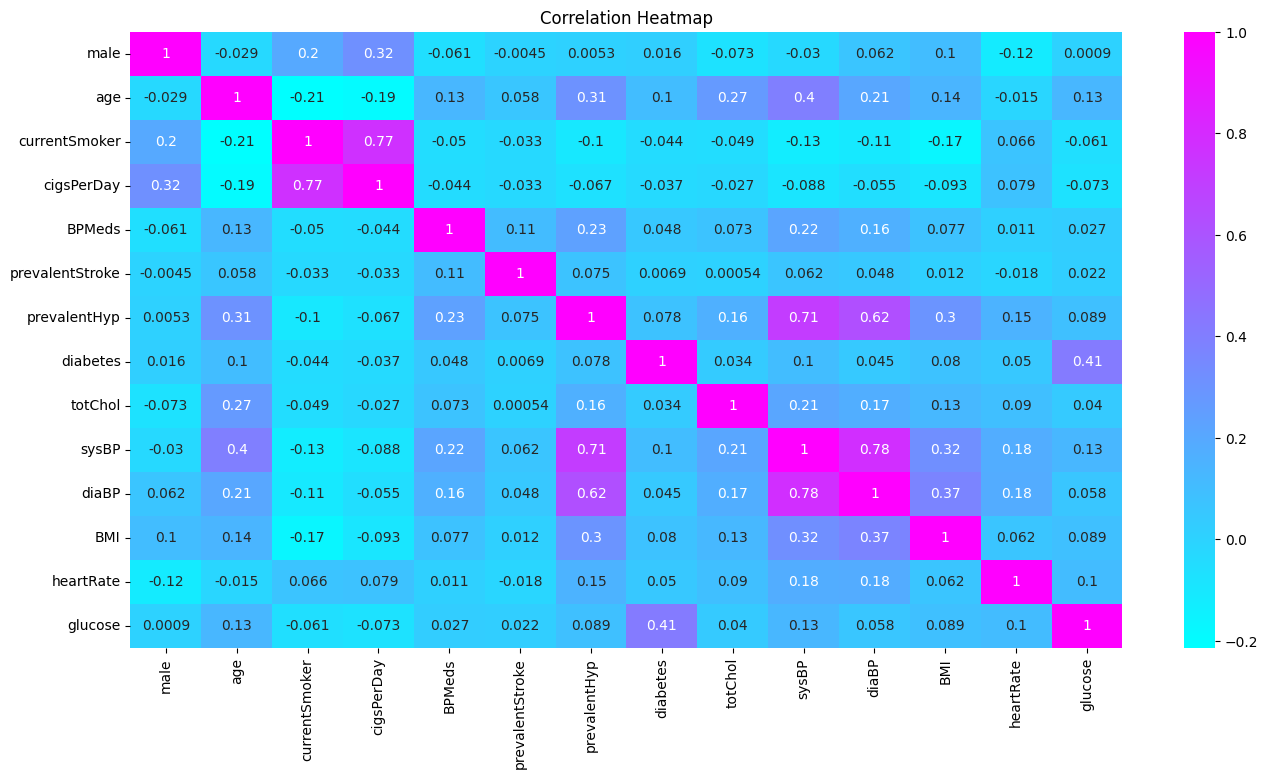

In [ ]:
corr = X.corr()
plt.figure(figsize=(16,8))
sns.heatmap(corr, annot=True, cmap='cool')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
X.corrwith(df['TenYearCHD'])

male               0.088428
age                0.225256
currentSmoker      0.019456
cigsPerDay         0.058264
BPMeds             0.083206
prevalentStroke    0.061810
prevalentHyp       0.177603
diabetes           0.097317
totChol            0.078794
sysBP              0.206939
diaBP              0.140480
BMI                0.071743
heartRate          0.023784
glucose            0.086053
dtype: float64

In [ ]:
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    return vif_data

In [ ]:
vif_data = calculate_vif(X)

In [ ]:
high_vif_columns = vif_data[vif_data['VIF'] > 5]['feature']

In [ ]:
high_vif_columns

1           age
8       totChol
9         sysBP
10        diaBP
11          BMI
12    heartRate
13      glucose
Name: feature, dtype: object

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, recall_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='saga'))
])

param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2', 'none']
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring = ['accuracy', 'roc_auc', 'f1'], refit='accuracy')
grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)
print("Best Params for each metric:")
for scorer in grid_search.scorer_:
    print(f"{scorer}: {grid_search.cv_results_['mean_test_' + scorer][grid_search.best_index_]}")

y_pred = grid_search.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best Params: {'logreg__C': 0.001, 'logreg__penalty': 'none'}
Best Params for each metric:
accuracy: 0.8499662164080377
roc_auc: 0.7183742335959554
f1: 0.1114697222513934

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1084
           1       0.67      0.07      0.13       188

    accuracy                           0.86      1272
   macro avg       0.76      0.53      0.53      1272
weighted avg       0.83      0.86      0.81      1272



The following were used:
> Model: LogRegression

> X sample with all values

> Scoring: accuracy

> Method: None

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 0)
X_ov, y_ov = ros.fit_resample(X, y)

In [ ]:
X_oversample_train, X_oversample_test, y_oversample_train, y_oversample_test = train_test_split(X_ov, y_ov, test_size=0.3, random_state=42)

param_grid_ov = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2', 'none']
}
grid_search_ov = GridSearchCV(pipeline, param_grid_ov, cv=5, scoring = ['accuracy', 'roc_auc', 'f1'], refit='accuracy')
grid_search_ov.fit(X_oversample_train, y_oversample_train)

print("Best Params:", grid_search_ov.best_params_)
print("Best Params for each metric:")
for scorer in grid_search_ov.scorer_:
    print(f"{scorer}: {grid_search_ov.cv_results_['mean_test_' + scorer][grid_search_ov.best_index_]}")

y_pred_ov = grid_search_ov.predict(X_oversample_test)

print("\nClassification Report:")
print(classification_report(y_oversample_test, y_pred_ov))

Best Params: {'logreg__C': 0.1, 'logreg__penalty': 'l1'}
Best Params for each metric:
accuracy: 0.6750150536700353
roc_auc: 0.7323144407229059
f1: 0.6786178368934292

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.66      0.67      1090
           1       0.66      0.69      0.68      1067

    accuracy                           0.67      2157
   macro avg       0.67      0.67      0.67      2157
weighted avg       0.67      0.67      0.67      2157



The following were used:
> Model: LogRegression

> X sample with all values

> Scoring: accuracy

> Method: OVERSampling

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_smoteresample, y_smoteresample = smote.fit_resample(X, y)

In [ ]:
X_smotesample_train, X_smotesample_test, y_smotesample_train, y_smotesample_test = train_test_split(X_smoteresample, y_smoteresample, test_size=0.3, random_state=42)

param_grid_smote = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2', 'none']
}
grid_search_smote = GridSearchCV(pipeline, param_grid_smote, cv=5, scoring = ['accuracy', 'roc_auc', 'f1'], refit='accuracy')
grid_search_smote.fit(X_smotesample_train, y_smotesample_train)

print("Best Params:", grid_search_smote.best_params_)
print("Best Params for each metric:")
for scorer in grid_search_smote.scorer_:
    print(f"{scorer}: {grid_search_smote.cv_results_['mean_test_' + scorer][grid_search_smote.best_index_]}")

y_pred_smote = grid_search_smote.predict(X_smotesample_test)

print("\nClassification Report:")
print(classification_report(y_smotesample_test, y_pred_smote))

Best Params: {'logreg__C': 0.1, 'logreg__penalty': 'l1'}
Best Params for each metric:
accuracy: 0.6772046963502006
roc_auc: 0.7425405176654089
f1: 0.6804209809604413

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.66      0.67      1090
           1       0.66      0.68      0.67      1067

    accuracy                           0.67      2157
   macro avg       0.67      0.67      0.67      2157
weighted avg       0.67      0.67      0.67      2157



The following were used:
> Model: LogRegression

> X sample with all values

> Scoring: accuracy

> Method: SMOTE


In [ ]:
X_changed = df[['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'diabetes', 'totChol', 'diaBP',
        'BMI', 'heartRate', 'glucose']]

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 0)
X_ov_c, y_ov_c = ros.fit_resample(X_changed, y)

In [ ]:
X_oversample_c_train, X_oversample_c_test, y_oversample_c_train, y_oversample_c_test = train_test_split(X_ov_c, y_ov_c, test_size=0.3, random_state=42)

param_grid_ov_c = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2', 'none']
}
grid_search_ov_c = GridSearchCV(pipeline, param_grid_ov_c, cv=5, scoring = ['accuracy', 'roc_auc', 'f1'], refit='accuracy')
grid_search_ov_c.fit(X_oversample_c_train, y_oversample_c_train)

print("Best Params:", grid_search_ov_c.best_params_)
print("Best Params for each metric:")
for scorer in grid_search_ov_c.scorer_:
    print(f"{scorer}: {grid_search_ov_c.cv_results_['mean_test_' + scorer][grid_search_ov_c.best_index_]}")

y_pred_ov_c = grid_search_ov_c.predict(X_oversample_c_test)

print("\nClassification Report:")
print(classification_report(y_oversample_c_test, y_pred_ov_c))

Best Params: {'logreg__C': 0.001, 'logreg__penalty': 'none'}
Best Params for each metric:
accuracy: 0.664482815125138
roc_auc: 0.7257382928659958
f1: 0.6711218431863976

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.64      0.66      1090
           1       0.65      0.69      0.67      1067

    accuracy                           0.67      2157
   macro avg       0.67      0.67      0.67      2157
weighted avg       0.67      0.67      0.67      2157



The following were used:
> X sample with strongly correlated values removed

> Scoring: accuracy

> Model: LogRegression

> Method: OVERSampling

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_smoteresample_c, y_smoteresample_c = smote.fit_resample(X_changed, y)

In [ ]:
X_smotesample_c_train, X_smotesample_c_test, y_smotesample_c_train, y_smotesample_c_test = train_test_split(X_smoteresample_c, y_smoteresample_c, test_size=0.3, random_state=42)

param_grid_smote = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2', 'none']
}
grid_search_smote_c = GridSearchCV(pipeline, param_grid_smote, cv=5, scoring = ['accuracy', 'roc_auc', 'f1'], refit='accuracy')
grid_search_smote_c.fit(X_smotesample_c_train, y_smotesample_c_train)

print("Best Params:", grid_search_smote_c.best_params_)
print("Best Params for each metric:")
for scorer in grid_search_smote_c.scorer_:
    print(f"{scorer}: {grid_search_smote_c.cv_results_['mean_test_' + scorer][grid_search_smote_c.best_index_]}")

y_pred_smote_c = grid_search_smote_c.predict(X_smotesample_c_test)

print("\nClassification Report:")
print(classification_report(y_smotesample_c_test, y_pred_smote_c))

Best Params: {'logreg__C': 0.1, 'logreg__penalty': 'l1'}
Best Params for each metric:
accuracy: 0.6654766534852454
roc_auc: 0.7226706262503365
f1: 0.6721295212715958

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.63      0.65      1090
           1       0.64      0.67      0.66      1067

    accuracy                           0.65      2157
   macro avg       0.65      0.65      0.65      2157
weighted avg       0.65      0.65      0.65      2157



The following was used:
> Model: LogRegression

> Scoring: accuracy

> X with removed values that strongly correlate with each other

> Method: SMOTE

> Grid Search showed that regularization used is L1, whereas in the previous model it showed None. This can be explained by the fact that the data for X_oversample were randomly generated, and multicollinearity, as such, disappeared. In the case of SMOTE, the data are synthesized using K-means, meaning they are maximally similar to their neighbors, which indicates that multicollinearity has not vanished.




In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
X_GB_train, X_GB_test, y_GB_train, y_GB_test = train_test_split(X, y, test_size=0.3, random_state=42)
pipeline_GB = Pipeline([
    ('scaler', StandardScaler()),
    ('gboost', GradientBoostingClassifier())
])

param_grid_GB = {'gboost__n_estimators': [100, 200], 'gboost__learning_rate': [0.01, 0.1], 'gboost__max_depth': [3, 4, 5],
                            'gboost__min_samples_split': [2, 4]}

grid_search_GB = GridSearchCV(pipeline_GB, param_grid_GB, cv=5, scoring=['accuracy', 'roc_auc', 'f1_macro'], refit='accuracy')

grid_search_GB.fit(X_GB_train, y_GB_train)

print("Best Params:", grid_search_GB.best_params_)
print("Best Params for each metric:")
for scorer in grid_search_GB.scorer_:
    print(f"{scorer}: {grid_search_GB.cv_results_['mean_test_' + scorer][grid_search_GB.best_index_]}")

y_pred_GB = grid_search_GB.predict(X_GB_test)

print("\nClassification Report:")
print(classification_report(y_GB_test, y_pred_GB))

Best Params: {'gboost__learning_rate': 0.01, 'gboost__max_depth': 3, 'gboost__min_samples_split': 2, 'gboost__n_estimators': 100}
Best Params for each metric:
accuracy: 0.846258538164103
roc_auc: 0.7016572030083201
f1_macro: 0.4605225644671841

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1084
           1       0.00      0.00      0.00       188

    accuracy                           0.85      1272
   macro avg       0.43      0.50      0.46      1272
weighted avg       0.73      0.85      0.78      1272



The following were used:
> Model: GradientBoostingClassifier

> X sample with all values

> Scoring: accuracy

> Method: None

> Regularization: YES

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X_GB_oversample_train, X_GB_oversample_test, y_GB_oversample_train, y_GB_oversample_test = train_test_split(X_ov, y_ov, test_size=0.3, random_state=42)

grid_search_GB_oversample = GridSearchCV(pipeline_GB, param_grid_GB, cv=5, scoring=['accuracy', 'roc_auc', 'f1_macro'], refit='accuracy')

grid_search_GB_oversample.fit(X_GB_oversample_train, y_GB_oversample_train)

print("Best Params:", grid_search_GB_oversample.best_params_)
print("Best Params for each metric:")
for scorer in grid_search_GB_oversample.scorer_:
    print(f"{scorer}: {grid_search_GB_oversample.cv_results_['mean_test_' + scorer][grid_search_GB_oversample.best_index_]}")

y_pred_GB_oversample = grid_search_GB_oversample.predict(X_GB_oversample_test)

print("\nClassification Report:")
print(classification_report(y_GB_oversample_test, y_pred_GB_oversample))

Best Params: {'gboost__learning_rate': 0.1, 'gboost__max_depth': 5, 'gboost__min_samples_split': 4, 'gboost__n_estimators': 200}
Best Params for each metric:
accuracy: 0.8604665946722841
roc_auc: 0.9378471739962333
f1_macro: 0.8599469937515561

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1090
           1       0.83      0.92      0.87      1067

    accuracy                           0.87      2157
   macro avg       0.87      0.87      0.87      2157
weighted avg       0.87      0.87      0.87      2157



The following were used:
> Model: GradientBoostingClassifier

> X sample with all values

> Scoring: accuracy

> Method: OverSampling

> Regularization: Yes

In [ ]:
X_GB_oversample_c_train, X_GB_oversample_c_test, y_GB_oversample_c_train, y_GB_oversample_c_test = train_test_split(X_ov_c, y_ov_c, test_size=0.3, random_state=42)

grid_search_GB_oversample_c = GridSearchCV(pipeline_GB, param_grid_GB, cv=5, scoring=['accuracy', 'roc_auc', 'f1_macro'], refit='accuracy')

grid_search_GB_oversample_c.fit(X_GB_oversample_c_train, y_GB_oversample_c_train)

print("Best Params:", grid_search_GB_oversample_c.best_params_)
print("Best Params for each metric:")
for scorer in grid_search_GB_oversample_c.scorer_:
    print(f"{scorer}: {grid_search_GB_oversample_c.cv_results_['mean_test_' + scorer][grid_search_GB_oversample_c.best_index_]}")

y_pred_GB_oversample_c = grid_search_GB_oversample_c.predict(X_GB_oversample_c_test)

print("\nClassification Report:")
print(classification_report(y_GB_oversample_c_test, y_pred_GB_oversample_c))

Best Params: {'gboost__learning_rate': 0.1, 'gboost__max_depth': 5, 'gboost__min_samples_split': 2, 'gboost__n_estimators': 200}
Best Params for each metric:
accuracy: 0.8594717691862727
roc_auc: 0.9349148205369872
f1_macro: 0.8589479999090124

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1090
           1       0.83      0.90      0.86      1067

    accuracy                           0.86      2157
   macro avg       0.86      0.86      0.86      2157
weighted avg       0.86      0.86      0.86      2157



The following were used:
> Model: GradientBoostingClassifier

> X sample with correlated values removed

> Scoring: accuracy

> Method: OverSampling

> Regularization: Yes

In [ ]:
from sklearn.model_selection import cross_val_score
X_GB_smotesample_train, X_GB_smotesample_test, y_GB_smotesample_train, y_GB_smotesample_test = train_test_split(X_smoteresample, y_smoteresample, test_size=0.3, random_state=42)

grid_search_GB_smotesample = GridSearchCV(pipeline_GB, param_grid_GB, cv=5, scoring=['accuracy', 'roc_auc', 'f1_macro'], refit='accuracy')

grid_search_GB_smotesample.fit(X_GB_smotesample_train, y_GB_smotesample_train)

scores = cross_val_score(grid_search_GB_smotesample, X_GB_smotesample_train, y_GB_smotesample_train, cv=5, scoring='accuracy')
test_score = grid_search_GB_smotesample.score(X_test, y_test)

y_pred_GB_smotesample = grid_search_GB_smotesample.predict(X_GB_smotesample_test)

print("Best Params:", grid_search_GB_smotesample.best_params_)
print("Best Params for each metric:")
for scorer in grid_search_GB_smotesample.scorer_:
    print(f"{scorer}: {grid_search_GB_smotesample.cv_results_['mean_test_' + scorer][grid_search_GB_smotesample.best_index_]}")
print("Accuracy scores for each fold:", scores)
print("Mean cross-validated accuracy on training set:", scores.mean())
print("Accuracy on test set:", test_score)
print("\nClassification Report:")
print(classification_report(y_GB_smotesample_test, y_pred_GB_smotesample))

Best Params: {'gboost__learning_rate': 0.1, 'gboost__max_depth': 5, 'gboost__min_samples_split': 2, 'gboost__n_estimators': 200}
Best Params for each metric:
accuracy: 0.8767642407718534
roc_auc: 0.9385124333261234
f1_macro: 0.8766738694360251
Accuracy scores for each fold: [0.87388282 0.86978131 0.87176938 0.86282306 0.88866799]
Mean cross-validated accuracy on training set: 0.873384913952235
Accuracy on test set: 0.9056603773584906

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      1090
           1       0.91      0.84      0.87      1067

    accuracy                           0.88      2157
   macro avg       0.88      0.88      0.88      2157
weighted avg       0.88      0.88      0.88      2157



The following were used:

>Model: GradientBoostingClassifier

>X sample with all values

>Scoring: accuracy

>Method: SmoteSampling

>Regularization: Yes


In [ ]:
X_GB_smotesample_c_train, X_GB_smotesample_c_test, y_GB_smotesample_c_train, y_GB_smotesample_c_test = train_test_split(X_smoteresample_c, y_smoteresample_c, test_size=0.3, random_state=42)

grid_search_GB_smotesample_c = GridSearchCV(pipeline_GB, param_grid_GB, cv=5, scoring=['accuracy', 'roc_auc', 'f1_macro'], refit='accuracy')

grid_search_GB_smotesample_c.fit(X_GB_smotesample_c_train, y_GB_smotesample_c_train)

print("Best Params:", grid_search_GB_smotesample_c.best_params_)
print("Best Params for each metric:")
for scorer in grid_search_GB_smotesample_c.scorer_:
    print(f"{scorer}: {grid_search_GB_smotesample_c.cv_results_['mean_test_' + scorer][grid_search_GB_smotesample_c.best_index_]}")

y_pred_GB_smotesample_c = grid_search_GB_smotesample_c.predict(X_GB_smotesample_c_test)

print("\nClassification Report:")
print(classification_report(y_GB_smotesample_c_test, y_pred_GB_smotesample_c))

Best Params: {'gboost__learning_rate': 0.1, 'gboost__max_depth': 5, 'gboost__min_samples_split': 4, 'gboost__n_estimators': 200}
Best Params for each metric:
accuracy: 0.8708012106112086
roc_auc: 0.9357440618313329
f1_macro: 0.8707048622091416

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1090
           1       0.90      0.84      0.87      1067

    accuracy                           0.87      2157
   macro avg       0.88      0.87      0.87      2157
weighted avg       0.88      0.87      0.87      2157



The following were used:
> Model: GradientBoostingClassifier

> X sample with removed values that correlate

> Scoring: accuracy

> Method: SmoteSampling

> Regularization: Yes

In [ ]:
import xgboost as xgb

In [ ]:
X_XGB_c_smotesample_train, X_XGB_c_smotesample_test, y_XGB_c_smotesample_train, y_XGB_c_smotesample_test = train_test_split(X_smoteresample, y_smoteresample, test_size = 0.3, random_state = 42)

Pipeline_XGB = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', xgb.XGBClassifier())

])

param_grid_XGB = {
    'classifier__max_depth' : [3, 4, 5],
    'classifier__learning_rate' : [0.01, 0.1, 0.2],
    'classifier__reg_lambda' : [0.01, 0.1, 1.0],
    'classifier__reg_alpha' : [0, 0.1, 1.0]
}

grid_search_XGB = GridSearchCV(Pipeline_XGB, param_grid_XGB, cv = 3, scoring = ['f1_macro', 'roc_auc', 'accuracy'], refit = 'accuracy')
grid_search_XGB.fit(X_XGB_c_smotesample_train, y_XGB_c_smotesample_train)

train_score_XGsmote = cross_val_score(grid_search_XGB, X_XGB_c_smotesample_train, y_XGB_c_smotesample_train, cv=5, scoring='accuracy')
test_score_XGsmote = grid_search_XGB.score(X_XGB_c_smotesample_test, y_XGB_c_smotesample_test)

print(f'Best params for Grid: ', grid_search_XGB.best_params_)
print('Best params for each metric: ')
for scorer in grid_search_XGB.scorer_:
    print(f"{scorer}: {grid_search_XGB.cv_results_['mean_test_' + scorer][grid_search_XGB.best_index_]}")

y_pred_XGB_smote = grid_search_XGB.predict(X_XGB_c_smotesample_test)

print("Mean cross-validated accuracy on training set:", train_score_XGsmote.mean())
print("Accuracy on test set:", test_score_XGsmote)
print('\nClassification Report: ')
print(classification_report(y_XGB_c_smotesample_test, y_pred_XGB_smote))

Best params for Grid:  {'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__reg_alpha': 1.0, 'classifier__reg_lambda': 0.01}
Best params for each metric: 
f1_macro: 0.8572241244340195
roc_auc: 0.9251683881509423
accuracy: 0.85728483402902
Mean cross-validated accuracy on training set: 0.86384276268901
Accuracy on test set: 0.8646267964765878

Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1090
           1       0.88      0.84      0.86      1067

    accuracy                           0.86      2157
   macro avg       0.87      0.86      0.86      2157
weighted avg       0.87      0.86      0.86      2157



The following were used:

>Model: XGBClassifier

>X sample with all values

>Scoring: accuracy

>Method: SmoteSampling

>Regularization: Yes


In [ ]:
from catboost import CatBoostClassifier
X_catboost_train, X_catboost_test, y_catboost_train, y_catboost_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

pipeline_CatBoost = Pipeline([
    ('scaler', StandardScaler()),
    ('catboost', CatBoostClassifier(silent=True))
])

param_grid_CatBoost = {
    'catboost__depth': [4, 6, 8],
    'catboost__learning_rate': [0.01, 0.05, 0.1],
    'catboost__iterations': [100, 500, 1000],
}


grid_search_CatBoost = GridSearchCV(pipeline_CatBoost, param_grid_CatBoost, cv=3, scoring = ['f1_macro', 'roc_auc', 'accuracy'], refit = 'accuracy', n_jobs=-1)
grid_search_CatBoost.fit(X_catboost_train, y_catboost_train)

train_score_nosmote = cross_val_score(grid_search_CatBoost, X_catboost_train, y_catboost_train, cv=5, scoring='accuracy')
test_score_nosmote = grid_search_CatBoost.score(X_catboost_test, y_catboost_test)

print(f'Best params for Grid: ', grid_search_CatBoost.best_params_)
print('Best params for each metric: ')
for scorer in grid_search_CatBoost.scorer_:
    print(f"{scorer}: {grid_search_CatBoost.cv_results_['mean_test_' + scorer][grid_search_CatBoost.best_index_]}")

y_pred_catboost = grid_search_CatBoost.predict(X_catboost_test)

print("Mean cross-validated accuracy on training set:", train_score_nosmote.mean())
print("Accuracy on test set:", test_score_nosmote)
print('\nClassification Report: ')
print(classification_report(y_catboost_test , y_pred_catboost))

Best params for Grid:  {'catboost__depth': 8, 'catboost__iterations': 500, 'catboost__learning_rate': 0.01}
Best params for each metric: 
f1_macro: 0.4988789887573815
roc_auc: 0.7012901480777453
accuracy: 0.8476046907343805
Mean cross-validated accuracy on training set: 0.844571629731832
Accuracy on test set: 0.8592767295597484

Classification Report: 
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1084
           1       0.76      0.07      0.13       188

    accuracy                           0.86      1272
   macro avg       0.81      0.53      0.53      1272
weighted avg       0.85      0.86      0.81      1272



In [ ]:
from catboost import CatBoostClassifier
X_catboost_smote_train, X_catboost_smote_test, y_catboost_smote_train, y_catboost_smote_test = train_test_split(X_smoteresample, y_smoteresample, test_size = 0.3, random_state = 42)

grid_search_smote_CatBoost = GridSearchCV(pipeline_CatBoost, param_grid_CatBoost, cv=3, scoring = ['f1_macro', 'roc_auc', 'accuracy'], refit = 'accuracy', n_jobs=-1)
grid_search_smote_CatBoost.fit(X_catboost_smote_train, y_catboost_smote_train)
scores = cross_val_score(grid_search_GB_smotesample, X_GB_smotesample_train, y_GB_smotesample_train, cv=5, scoring='accuracy')

train_score_smote = cross_val_score(grid_search_smote_CatBoost, X_catboost_smote_train, y_catboost_smote_train, cv=5, scoring='accuracy')
test_score_smote = grid_search_smote_CatBoost.score(X_catboost_smote_test, y_catboost_smote_test)

print(f'Best params for Grid: ', grid_search_smote_CatBoost.best_params_)
print('Best params for each metric: ')
for scorer in grid_search_smote_CatBoost.scorer_:
    print(f"{scorer}: {grid_search_smote_CatBoost.cv_results_['mean_test_' + scorer][grid_search_smote_CatBoost.best_index_]}")

y_pred_smote_catboost = grid_search_smote_CatBoost.predict(X_catboost_smote_test)

print("Mean cross-validated accuracy on training set:", train_score_smote.mean())
print("Accuracy on test set:", test_score_smote)
print('\nClassification Report: ')
print(classification_report(y_catboost_smote_test, y_pred_smote_catboost))

Best params for Grid:  {'catboost__depth': 8, 'catboost__iterations': 1000, 'catboost__learning_rate': 0.1}
Best params for each metric: 
f1_macro: 0.8813158893983695
roc_auc: 0.9451816315119729
accuracy: 0.8813357185450208
Mean cross-validated accuracy on training set: 0.8932624708551076
Accuracy on test set: 0.903569772832638

Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1090
           1       0.92      0.88      0.90      1067

    accuracy                           0.90      2157
   macro avg       0.90      0.90      0.90      2157
weighted avg       0.90      0.90      0.90      2157



The following were used:

>Model: CatBoost

>X sample with all values

>Scoring: accuracy

>Method: SmoteSampling

>Regularization: Yes

CONCLUSION:
The best model, very good results across all metrics, excellent cross_val score- 0.887% on training data, and more importantly, 0.899% on test data, indicating that the model correctly predicts outcomes on new, unseen data in 90% of cases.

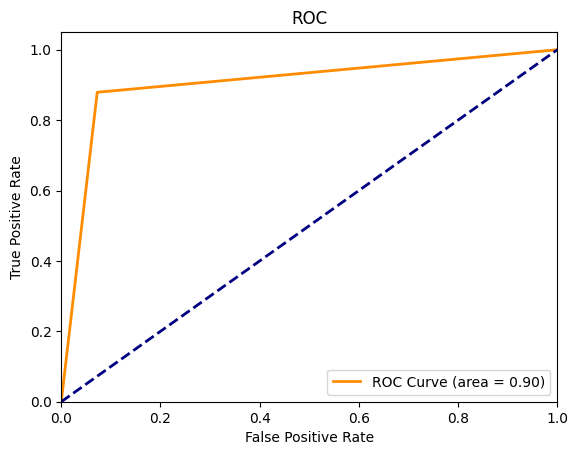

In [ ]:
fpr_Cat_smote, tpr_Cat_smote, threshold_Cat_smote = roc_curve(y_catboost_smote_test, y_pred_smote_catboost)
roc_auc_cat_smote = auc(fpr_Cat_smote, tpr_Cat_smote)
def roc_auc(x, y, roc):
  plt.figure()
  plt.plot(x, y, color = 'darkorange', lw = 2, label = 'ROC Curve (area = %0.2f)' % roc)
  plt.plot([0,1], [0,1], color = 'navy', lw = 2, linestyle = '--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC')
  plt.legend(loc = 'lower right')
  return plt.show()

roc_auc(fpr_Cat_smote, tpr_Cat_smote, roc_auc_cat_smote)

In [ ]:
precision_cat_smote, recall_cat_smote, thresholds_cat_smote = precision_recall_curve(y_catboost_smote_test, y_pred_smote_catboost)
pr_auc_cat_smote = auc(recall_cat_smote, precision_cat_smote)

In [ ]:
def pr_auc(x, y, pr_roc):
  plt.figure()
  plt.plot(x, y, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_roc)
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision-Recall Curve')
  plt.legend(loc="upper right")
  return plt.show()

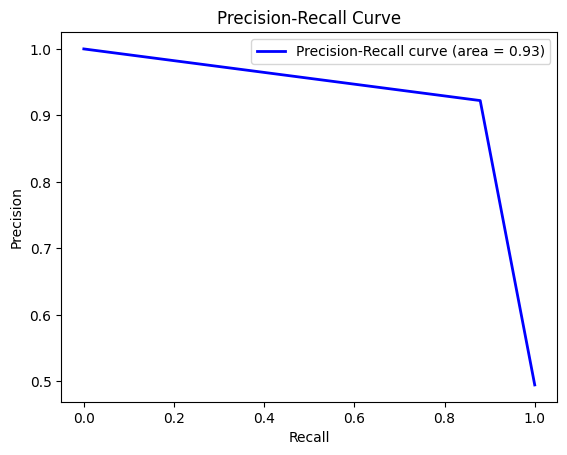

In [ ]:
pr_auc(recall_cat_smote, precision_cat_smote, pr_auc_cat_smote)